# **London Airbnb Dataset EDA**
___

## **Importación de librerías**

In [4]:
# Librerías de análisis de datos
import numpy as np
import pandas as pd

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

## **Exploración básica del dataset**

Estas son las variables por entrada que contiene el dataset:
+ **id**: número de identificación de la publicación del alojamiento.
+ **name**: nombre de la publicación del alojamiento. 
+ **host_id**: número de identificación del anfitrión.
+ **host_name**: nombre del anfitrión.
+ **neighbourhood_group**: grupo de barrios.
+ **neighbourhood**:barrio o vecindario. 
+ **latitude**: latitud de la ubicación del alojamiento.
+ **longitude**:longitud de la ubicación del alojamiento.
+ **room_type**: tipo de habitación.
+ **price**: precio.
+ **minimum_nights**: noches mínimas que te puedes quedar. 
+ **number_of_reviews**: cuantas personas han revisado el anuncio.
+ **last_review**: última revisión de la publicación.
+ **reviews_per_month**: promedio de revisión por mes.
+ **calculated_host_listings_count**: recuento de host calculados por un propietario/a.
+ **availability_365**: disponibilidad en los 365 días.

In [5]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./london_airbnb.csv"

# Importamos el dataset y comprobamos que está correcto
df = pd.read_csv(path_to_data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1,158
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,NaN,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2,336


In [6]:
#Cantidad de entradas y columnas. 
df.shape

(85068, 16)

**Se observa:**
+ 16 columnas. 
+ 85068 entradas.

In [7]:
# Información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  int64  
 1   name                            85043 non-null  object 
 2   host_id                         85068 non-null  int64  
 3   host_name                       85056 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   85068 non-null  object 
 6   latitude                        85068 non-null  float64
 7   longitude                       85068 non-null  float64
 8   room_type                       85068 non-null  object 
 9   price                           85068 non-null  int64  
 10  minimum_nights                  85068 non-null  int64  
 11  number_of_reviews               85068 non-null  int64  
 12  last_review                     

**Se observa:**
+ La columna "neighbourhood_group" se encuentra vacía por lo que no se considerará por falta de datos.
+ EL resto de columnas, en su mayoría, se encuentran completas. A excepción de las columnas: reviews_per_month, last_review, name y host_name.

In [8]:
#Conteo de datos faltantes por columna. 
df.isnull().sum(axis = 0)

id                                    0
name                                 25
host_id                               0
host_name                            12
neighbourhood_group               85068
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20006
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Se observa:**
+ Las columnas con más datos faltantes son last_review y reviews_per_month, la cantidad es significativa.

## **Creación de nueva tabla**
Se evalúa las columnas que nos sirven para el propósito del proyecto y las que no se descartan.

In [9]:
# Creando nueva tabla "df_londres" descartando columnas:
df_londres = df.drop(columns=["neighbourhood_group","id", "name","host_id","host_name"])
df_londres.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
3,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1,158
4,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2,336


In [10]:
# Se comprueba la eliminación de columnas.
df_londres.shape

(85068, 11)

**Se observa:**
+ Se redujo de 16 a 11 columnas.

In [11]:
# Información de nueva tabla "df_londres":
df_londres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   85068 non-null  object 
 1   latitude                        85068 non-null  float64
 2   longitude                       85068 non-null  float64
 3   room_type                       85068 non-null  object 
 4   price                           85068 non-null  int64  
 5   minimum_nights                  85068 non-null  int64  
 6   number_of_reviews               85068 non-null  int64  
 7   last_review                     65062 non-null  object 
 8   reviews_per_month               65062 non-null  float64
 9   calculated_host_listings_count  85068 non-null  int64  
 10  availability_365                85068 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 7.1+ MB


In [12]:
# Datos faltantes en porcentaje ordenado de mayor a menor.
df_londres.isnull().mean().sort_values(ascending = False)

last_review                       0.235177
reviews_per_month                 0.235177
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

**Se observa:**
+ Falta de datos solo en las columnas last_review y reviews_per_month. Mismo porcentaje= 23.5177%.

In [13]:
#Identificación de variables de la nueva tabla "df_londres":
categoricas = ["neighbourhood", "room_type", "last_review"]
numericas = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

In [14]:
# Principales descriptores estadisticos
df_londres.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85068.000000,85068.000000,85068.000000,85068.000000,85068.000000,65062.000000,85068.000000,85068.000000
mean,51.509798,-0.128343,122.336766,4.148105,17.471152,1.201995,22.151150,118.471987
std,0.046341,0.093034,220.749123,16.681720,36.789578,1.402728,110.654631,134.840097
min,51.294790,-0.496680,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,51.485610,-0.188412,47.000000,1.000000,1.000000,0.250000,1.000000,0.000000
50%,51.514015,-0.125725,84.000000,2.000000,4.000000,0.730000,1.000000,58.000000
75%,51.537580,-0.070127,140.000000,3.000000,17.000000,1.630000,5.000000,244.000000
max,51.681690,0.285390,12345.000000,1125.000000,716.000000,20.130000,999.000000,365.000000


**Se observa:**

Datos atípicos en
+ Price: el mínimo valor es "0" y su máximo valor "12 345".
+ Minimun _nights: la máxima cantidad de noches que se pueden quedar como mínimo es de 1125 días.
+ Calculated_host_listings_count: la cantidad máxima de alojamientos de un host asciende a 999.

In [15]:
#datos duplicados en el DataFrame
df_dup = df_londres[df_londres.duplicated()]
len(df_dup)

0

## **Limpieza de datos**

### **Variables categóricas**

In [16]:
# Se observan los valores de las variables categóricas: neighbourhood y room_type
for col in ["neighbourhood", "room_type"]:
    print(f"Valores en '{col}':")
    for i in df_londres[col].unique():
        print("\t"+str(i))
    print()

Valores en 'neighbourhood':
	Lambeth
	Islington
	Kensington and Chelsea
	Westminster
	Wandsworth
	Croydon
	Tower Hamlets
	Hammersmith and Fulham
	Barnet
	Merton
	Hounslow
	Camden
	Haringey
	Richmond upon Thames
	Southwark
	Hackney
	Brent
	Ealing
	Waltham Forest
	Newham
	Lewisham
	Enfield
	City of London
	Greenwich
	Bromley
	Hillingdon
	Havering
	Barking and Dagenham
	Harrow
	Redbridge
	Kingston upon Thames
	Bexley
	Sutton

Valores en 'room_type':
	Entire home/apt
	Private room
	Hotel room
	Shared room



In [17]:
# Ahora buscamos los NaN en la tabla df_londres
df_londres.isnull().sum()

neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20006
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
# Comprobamos el porcentaje de valores perdidos para cada caso
lost_review = df_londres["last_review"].isnull().sum() / len(df["last_review"])
print(f"Porcentaje de valores perdidos en last_review: {round(lost_review, 2)*100}%")
lost_month = df_londres["reviews_per_month"].isnull().sum() / len(df["reviews_per_month"])
print(f"Porcentaje de valores perdidos en last_month: {round(lost_month, 2)*100}%")

Porcentaje de valores perdidos en last_review: 24.0%
Porcentaje de valores perdidos en last_month: 24.0%


**Se observa:**
+ Los valores perdidos no son determinantes para excluir las variables por lo que recurriremos a la imputación de datos. En el caso de last_review, por tratarse de fechas, lo más recomendable será usar la moda y en el caso de reviews_per_month se usará el promedio para imputar los datos faltantes.

In [19]:
# Moda de last_review
# Especificar el 0 es importante sino el resultado será una Serie
mode_review = df_londres["last_review"].mode()[0]
print(mode_review)

2019-11-03


In [20]:
#Imputación de datos por la moda
df_londres["last_review"].fillna(mode_review, inplace=True)
#Averiguar datos faltantes
df_londres.isnull().sum()

neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Se observa:**
+ Los datos faltantes en las_review han sido reemplazados.

In [21]:
#Promedio de review per month
promedio = df_londres["reviews_per_month"].mean()
print(promedio)


1.2019954812332851


In [22]:
#imputacion de datos por el promedio
df_londres["reviews_per_month"].fillna(promedio, inplace=True)
#averiguar datos faltantes
df_londres.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Se observa:**
+ En nuestra nueva tabla "df_londres" no hay datos faltantes ya que han sido reemplazados correctamente.

In [23]:
# df_londres sin datos faltantes o "NaN"
df_londres.head(40)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.580000,2,336
1,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.170000,2,365
2,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.330000,2,268
3,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.730000,1,158
4,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.040000,2,336
5,Westminster,51.52098,-0.14002,Entire home/apt,300,3,41,2019-06-19,0.390000,15,251
6,Wandsworth,51.44004,-0.18755,Private room,42,1,177,2019-08-05,1.730000,1,67
7,Croydon,51.41940,-0.08722,Private room,65,1,0,2019-11-03,1.201995,1,365
8,Wandsworth,51.44687,-0.21874,Entire home/apt,65,90,34,2019-09-15,0.760000,1,39
9,Tower Hamlets,51.49995,-0.02624,Entire home/apt,79,2,137,2017-04-21,1.230000,1,5


### **Comportamiento de las variables numéricas**

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

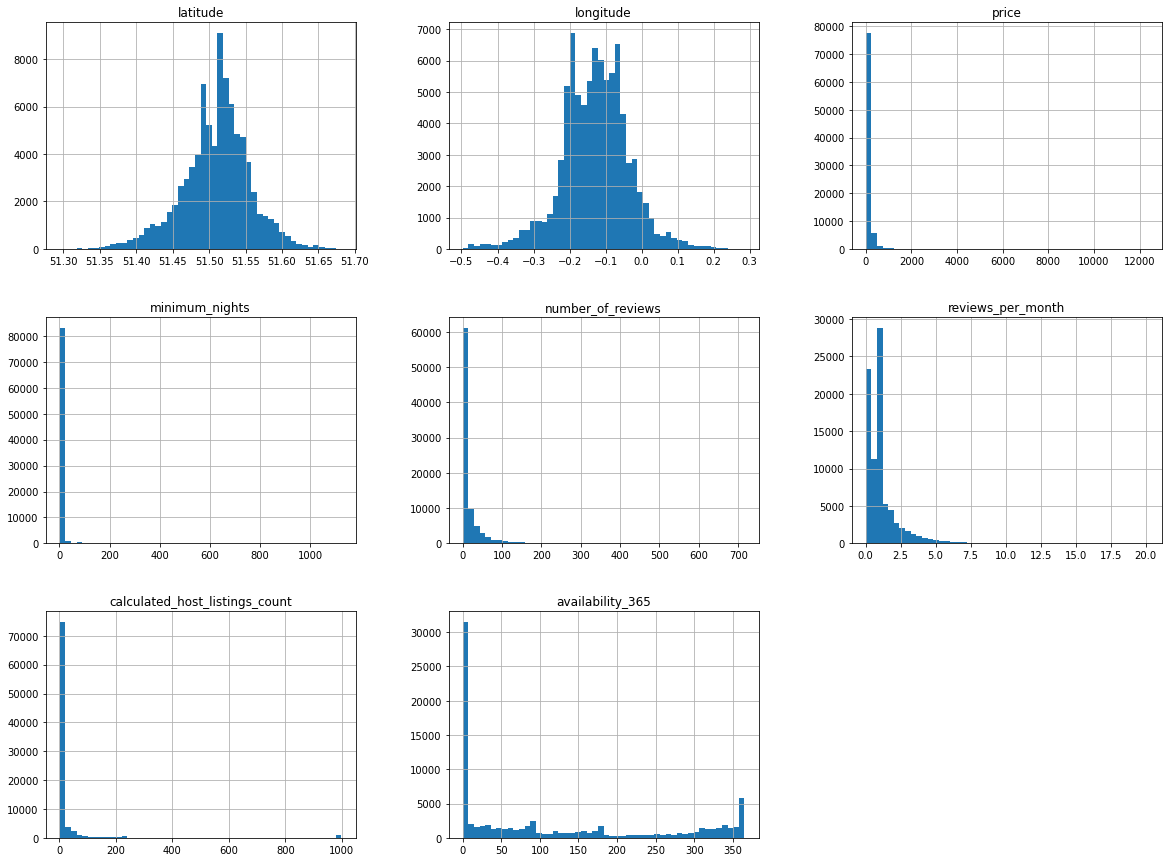

In [24]:
# Visualizamos la distribución de las variables numéricas
df_londres[numericas].hist(bins=50, figsize=(20,15))

**Se observa:**
+ A excepción de latitud y longitud las demás variables no poseen una distribución normal, lo que podría traer inconvenientes.


**NOTA**: **la distribución no varía pese a la imputación de datos faltantes**

### **Analizando valores "0"**

In [25]:
#Detectando valores "0" en price
#Nueva variable
df_price = df_londres [df_londres["price"] == 0] 
df_price.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21308,Hackney,51.53964,-0.05461,Private room,0,2,30,2019-08-08,1.520000,2,0
28705,Waltham Forest,51.57500,-0.03317,Private room,0,2,77,2019-11-01,2.550000,1,31
29368,Camden,51.54414,-0.16598,Private room,0,1,0,2019-11-03,1.201995,1,0
31417,Tower Hamlets,51.53171,-0.05539,Private room,0,3,0,2019-11-03,1.201995,1,358
33747,Westminster,51.51647,-0.13315,Private room,0,1,11,2018-03-25,0.410000,2,0


In [26]:
for i in range(len(df_londres['price'])):

    if 0 == df_londres['price'][i]:
        print(df_londres['price'][i])
        

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


**Se observa:**
+ Existen solo 18 registros en cero, con esto se pueden sacar dos conclusiones:
    - Para una data de mas de 80000 entradas, 18 datos faltantes no afectan el comportamiento del posible modelo.
    - Imputar datos para tener una data completa sin valores anomalos como lo es un 0 en el price.

In [27]:
#calculo el promedio de precio
promedioprice = df_londres["price"].mean()
print(promedioprice)

122.33676588141252


In [28]:
#df['name'] = df['name'].str.replace('a','X')
df_londres['price'] = df_londres['price'].replace([0], promedioprice)

In [29]:
for i in range(len(df_londres['price'])):

    if 0 == df_londres['price'][i]:
        print(df_londres['price'][i])
        

In [30]:
# Analizando valores en "0" en availability_365
df5 = df_londres [df_londres["availability_365"] == 0] 
df5.head(100)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,Lambeth,51.46441,-0.12669,Private room,54.0,2,41,2018-01-30,0.560000,1,0
39,Hackney,51.55397,-0.03340,Private room,120.0,2,0,2019-11-03,1.201995,1,0
42,Westminster,51.51662,-0.17332,Entire home/apt,94.0,7,16,2019-10-07,0.160000,1,0
46,Waltham Forest,51.55842,0.00382,Private room,35.0,2,2,2011-07-02,0.020000,1,0
53,Hammersmith and Fulham,51.50803,-0.21599,Private room,125.0,1,0,2019-11-03,1.201995,1,0
...,...,...,...,...,...,...,...,...,...,...,...
562,Redbridge,51.56075,0.04069,Private room,200.0,14,0,2019-11-03,1.201995,1,0
564,Islington,51.54314,-0.08991,Private room,120.0,1,0,2019-11-03,1.201995,1,0
565,Kensington and Chelsea,51.49273,-0.19404,Entire home/apt,200.0,7,0,2019-11-03,1.201995,1,0
566,Camden,51.53918,-0.14702,Private room,99.0,2,262,2019-10-27,2.840000,1,0


**Se observa:**
+ Existen más de 100 datos faltantes en la columna availability_365.

NOTAS:
+ Los ceros de price afectan en algo a mi dataset? solo 18.

+ Los ceros en disponibilidad al año representan algo? quizás son alojamientos no disponibles por el momento. 

## **Hipótesis y gráficas**

Objetivo: análisis de datos y predicción para alquileres de pisos y habitaciones con fines vacacionales. 
___

In [31]:
#En función de la matriz de correlación de las variables concluiremos hipótesis.
#Matriz de correlación con método pearson
df_londres.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.109929,-0.012391,0.005808,-0.000583,0.004184,-0.016858,-0.004299
longitude,0.109929,1.000000,-0.066183,-0.005597,-0.022370,-0.023417,-0.055328,-0.034430
price,-0.012391,-0.066183,1.000000,0.060410,-0.067250,-0.031477,0.113116,0.097756
minimum_nights,0.005808,-0.005597,0.060410,1.000000,-0.030509,-0.051543,-0.016381,0.036571
number_of_reviews,-0.000583,-0.022370,-0.067250,-0.030509,1.000000,0.537729,-0.058402,0.122317
reviews_per_month,0.004184,-0.023417,-0.031477,-0.051543,0.537729,1.000000,-0.035241,0.116106
calculated_host_listings_count,-0.016858,-0.055328,0.113116,-0.016381,-0.058402,-0.035241,1.000000,-0.048355
availability_365,-0.004299,-0.034430,0.097756,0.036571,0.122317,0.116106,-0.048355,1.000000


<AxesSubplot:>

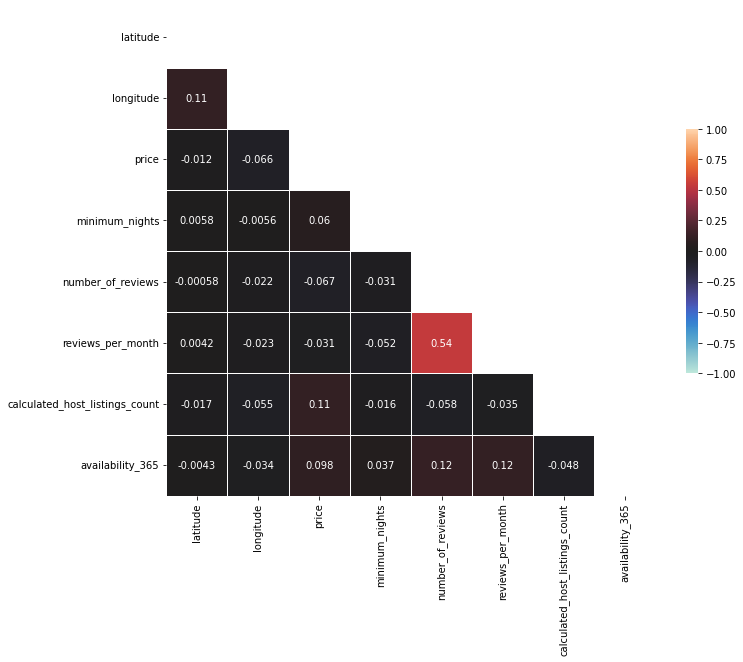

In [32]:
# Mapa de calor: visualizamos las correlaciones de las variables numéricas con el método automático = pearson.

# Generamos una máscara para no duplicar los valores
mask = np.triu(np.ones_like(df_londres.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(df_londres.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

**Se observa:**
+ La fuerza de las relaciones entre las variables son débiles, con excepción de la relación de reviews_per_month y number_of_reviews.
+ La dirección de las correlaciones, en su mayoría, son negativas.

In [33]:
#Se genera matriz de correlación con el método spearman para distribuciones "anormales". 
coor_matrix = df_londres[numericas].corr(method= "spearman")
coor_matrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.148283,-0.056289,0.007452,-0.012266,-0.003871,-0.004384,-0.020939
longitude,0.148283,1.000000,-0.173826,-0.021062,-0.007361,-0.028756,-0.082873,-0.055128
price,-0.056289,-0.173826,1.000000,0.167482,-0.093955,-0.003122,0.233544,0.121993
minimum_nights,0.007452,-0.021062,0.167482,1.000000,-0.095034,-0.197212,-0.058181,-0.063552
number_of_reviews,-0.012266,-0.007361,-0.093955,-0.095034,1.000000,0.223745,0.049243,0.149253
reviews_per_month,-0.003871,-0.028756,-0.003122,-0.197212,0.223745,1.000000,0.152090,0.218537
calculated_host_listings_count,-0.004384,-0.082873,0.233544,-0.058181,0.049243,0.152090,1.000000,0.339592
availability_365,-0.020939,-0.055128,0.121993,-0.063552,0.149253,0.218537,0.339592,1.000000


<AxesSubplot:>

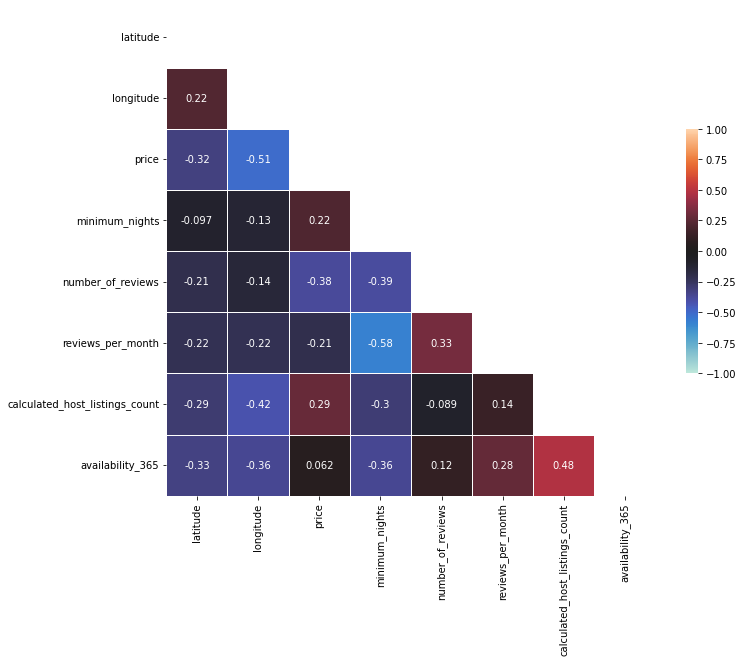

In [34]:
# Nuevo mapa de calor: visualizamos las correlaciones de las variables numéricas con el método spearman.

#Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(coor_matrix.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(coor_matrix.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

**Se observa:** la fuerza y la dirección de las correlaciones entre las variables.

**CORRELACIONES POSITIVAS:**
+ Asociación media (0.3): availability_365 y calculated_host_listings_count, reviews_per_month y number_of_reviews.
+ Asociación moderada (0.5): 
+ Asociación alta (0.7): 
+ Asociación muy alta (0.9):

**CORRELACIONES NEGATIVAS:**
+ Asociación media (-0.3): calculated_host_listings_count y longitude, number_of_reviews y price, availability_365 y mimimum_nights, availability_365 y longitude, availability_365 y latitude,price y latitude, calculated_host_listings_count y minimum_nights, number_of_reviews y minimum_nights.
+ Asociación moderada (-0.5): reviews_per_month y minimum_nights, price y longitude.
+ Asociación alta (-0.7): 
+ Asociación muy alta (-0.9):


**Considerar:**
- Documentarse sobre coeficientes de correlación lineal.

+ ### **RELACIONES**
A partir del mapa de calor se mejorará el análisis descriptivo de las variables y se deducirán posibles hipótesis. Se considerarán las variables que se ubiquen de asociación media en adelante,es decir, las más cercanas a una correlación positiva o negativa perfecta para ser analizadas.
___

**NUMÉRICAS**

Positivo
+ Relación media positiva: availability _365 y calculated_host_listings_count. Hiṕotesis: a mayor oferta de alojamientos del host, mayor cantidad de alojamientos disponibles al año. 
+ Relación media positiva: number_of_reviews y reviews_per_month. Hipótesis: a mayor númer de revisiones, mayor número de revisiones por mes. **Utilidad/Necesidad/Recomendaciones:** Sitios con mayor interacción web (tráfico de redes, mejor marketing,mayor visibilización del alojamiento, publicidad, mejor estrategia de marketing, etc.)



Negativo
+ Relación media negativa: number_of_reviews y price. Hipótesis: de acuerdo a la visita del alojamiento varía el precio.
+ Relación media negativa: availability_365 y minimun_nights. Hipótesis: al tener más/menos días como mínimo de alojamiento hay menos/más dias disponibles anuales. 
+ Relación media negativa: calculated_host_listings_count y minimum_nights. Hipótesis: al tener más alojamientos un host oferta menos días como "minimum_nights". 
+ Relación media negativa: calculated_host_listings_count y longitude, availability_365 y longitude, availability_365 y latitude,price y latitude. Hipótesis: A mayor/menor longitud/latitude puede variar la cantidad de alojamientos por host, la disponibilidad anual y el precio.
+ Relación moderada:reviews_per_month y minimum_nights. Hipótesis: a menos/más noches mínimas de alojamiento mayor/menor vistas por mes. Tipo de viajeros.

___
1. **Relación media positiva:** availability _365 y calculated_host_listings_count. **Hiṕotesis:** a mayor oferta de alojamientos del host mayor cantidad de alojamientos disponibles al año. Si discriminamos por neighbourd, podremos saber los sitios con más alojamientos y la disponibilidad anual.

<AxesSubplot:xlabel='availability_365', ylabel='calculated_host_listings_count'>

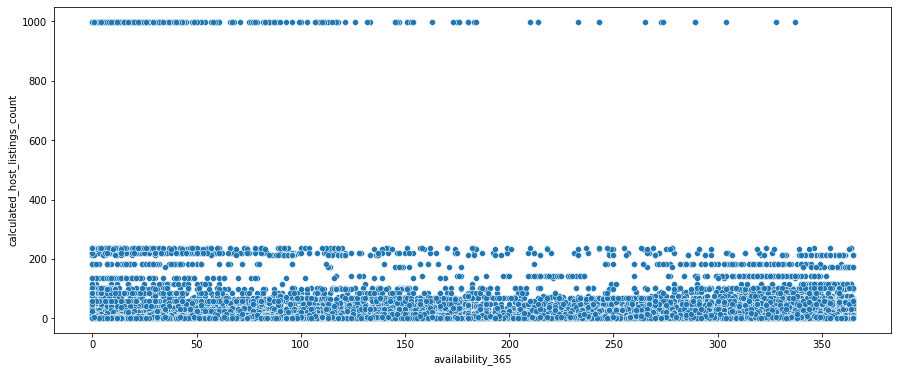

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df_londres, x= 'availability_365', y ='calculated_host_listings_count')

**NOTA: se observa datos atípicos y se descarta la hipótesis.**

<AxesSubplot:xlabel='calculated_host_listings_count'>

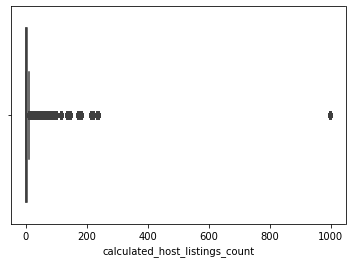

In [36]:
#Analizamos outlier de calculated_host_listings_count
sns.boxplot(x=df_londres["calculated_host_listings_count"])

In [37]:
#Filtrar por condiciones: calculated_host_listings_count menores a 100.
df1=df_londres[df_londres["calculated_host_listings_count"] < 100]
df1.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,51.46225,-0.11732,Entire home/apt,88.0,3,185,2019-09-15,1.58,2,336
1,Islington,51.56802,-0.11121,Private room,65.0,1,19,2019-10-07,0.17,2,365
2,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105.0,2,339,2019-07-30,3.33,2,268
3,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100.0,30,88,2019-09-23,0.73,1,158
4,Islington,51.55071,-0.08547,Private room,77.0,1,207,2019-10-21,2.04,2,336


<AxesSubplot:xlabel='availability_365', ylabel='calculated_host_listings_count'>

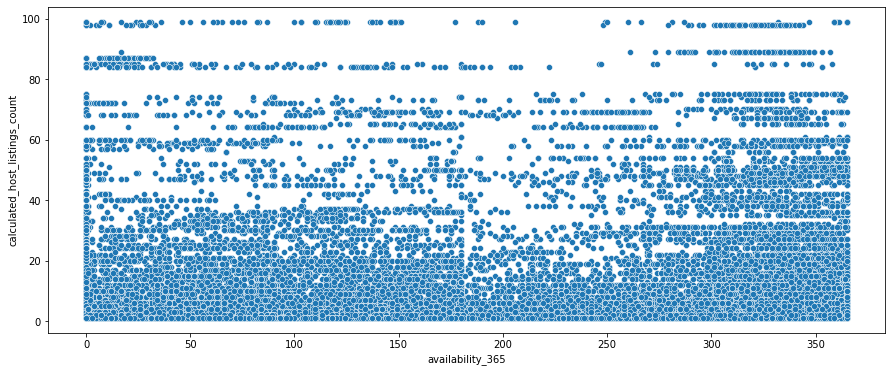

In [38]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df1, x= 'availability_365', y ='calculated_host_listings_count')

**NOTA:**
+ Relación baja de variables.

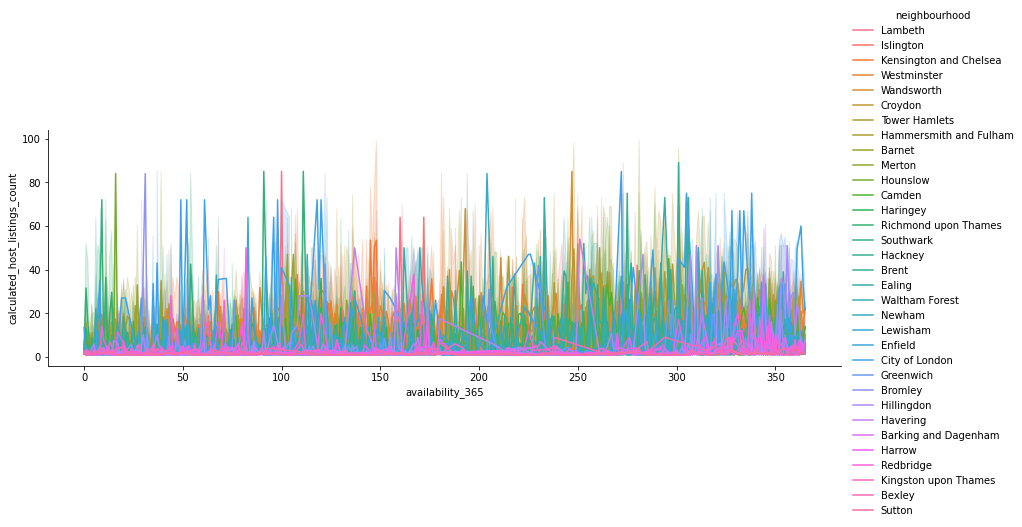

In [39]:
#Los sitios con mayor alojamientos y disponibilidad anual. Hue: neighbourhood
sns.relplot(x="availability_365", y="calculated_host_listings_count", hue="neighbourhood", kind="line", aspect=3, height=4, data=df1);

**Se observa:**
+ La diposnibilidad anual del alojamiento no depende necesariamente de la cantidad de alojamientos que tenga un host. Sin embargo, hay ciudades donde los host tienen mayor cantidad de alojamientos y tienen una disponilidad anual mayor. 
+ **Inválido.**

2. **Relación media positiva:** number_of_reviews y reviews_per_month. **Hipótesis:** a mayor númer de revisiones, mayor número de revisiones por mes. Sitios más buscados. 

<AxesSubplot:xlabel='reviews_per_month', ylabel='number_of_reviews'>

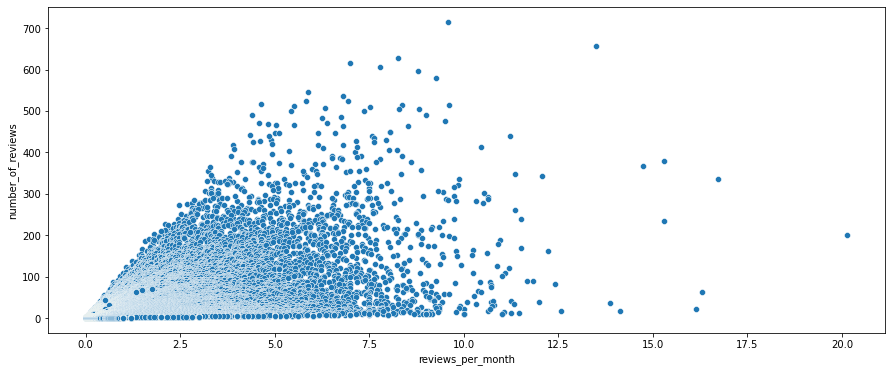

In [40]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df1, x= 'reviews_per_month', y ='number_of_reviews')

**Se observa:**
+ A mayor número de vistas, mayor reseñas al mes.
+ Ambas variables pueden ser útiles para lograr una mayor interacción y tráfico en las redes.
+ Pueden ser indicador de demanda.
+ En la data actual no se puede distinguir si esta interacción es favorable o desfavorable. Sin embargo, es aprovechable si se planifica una buena estrategia de marketing parar lograr una posible tendencia. 

**por neighbourdhood o tipo de habitación.**

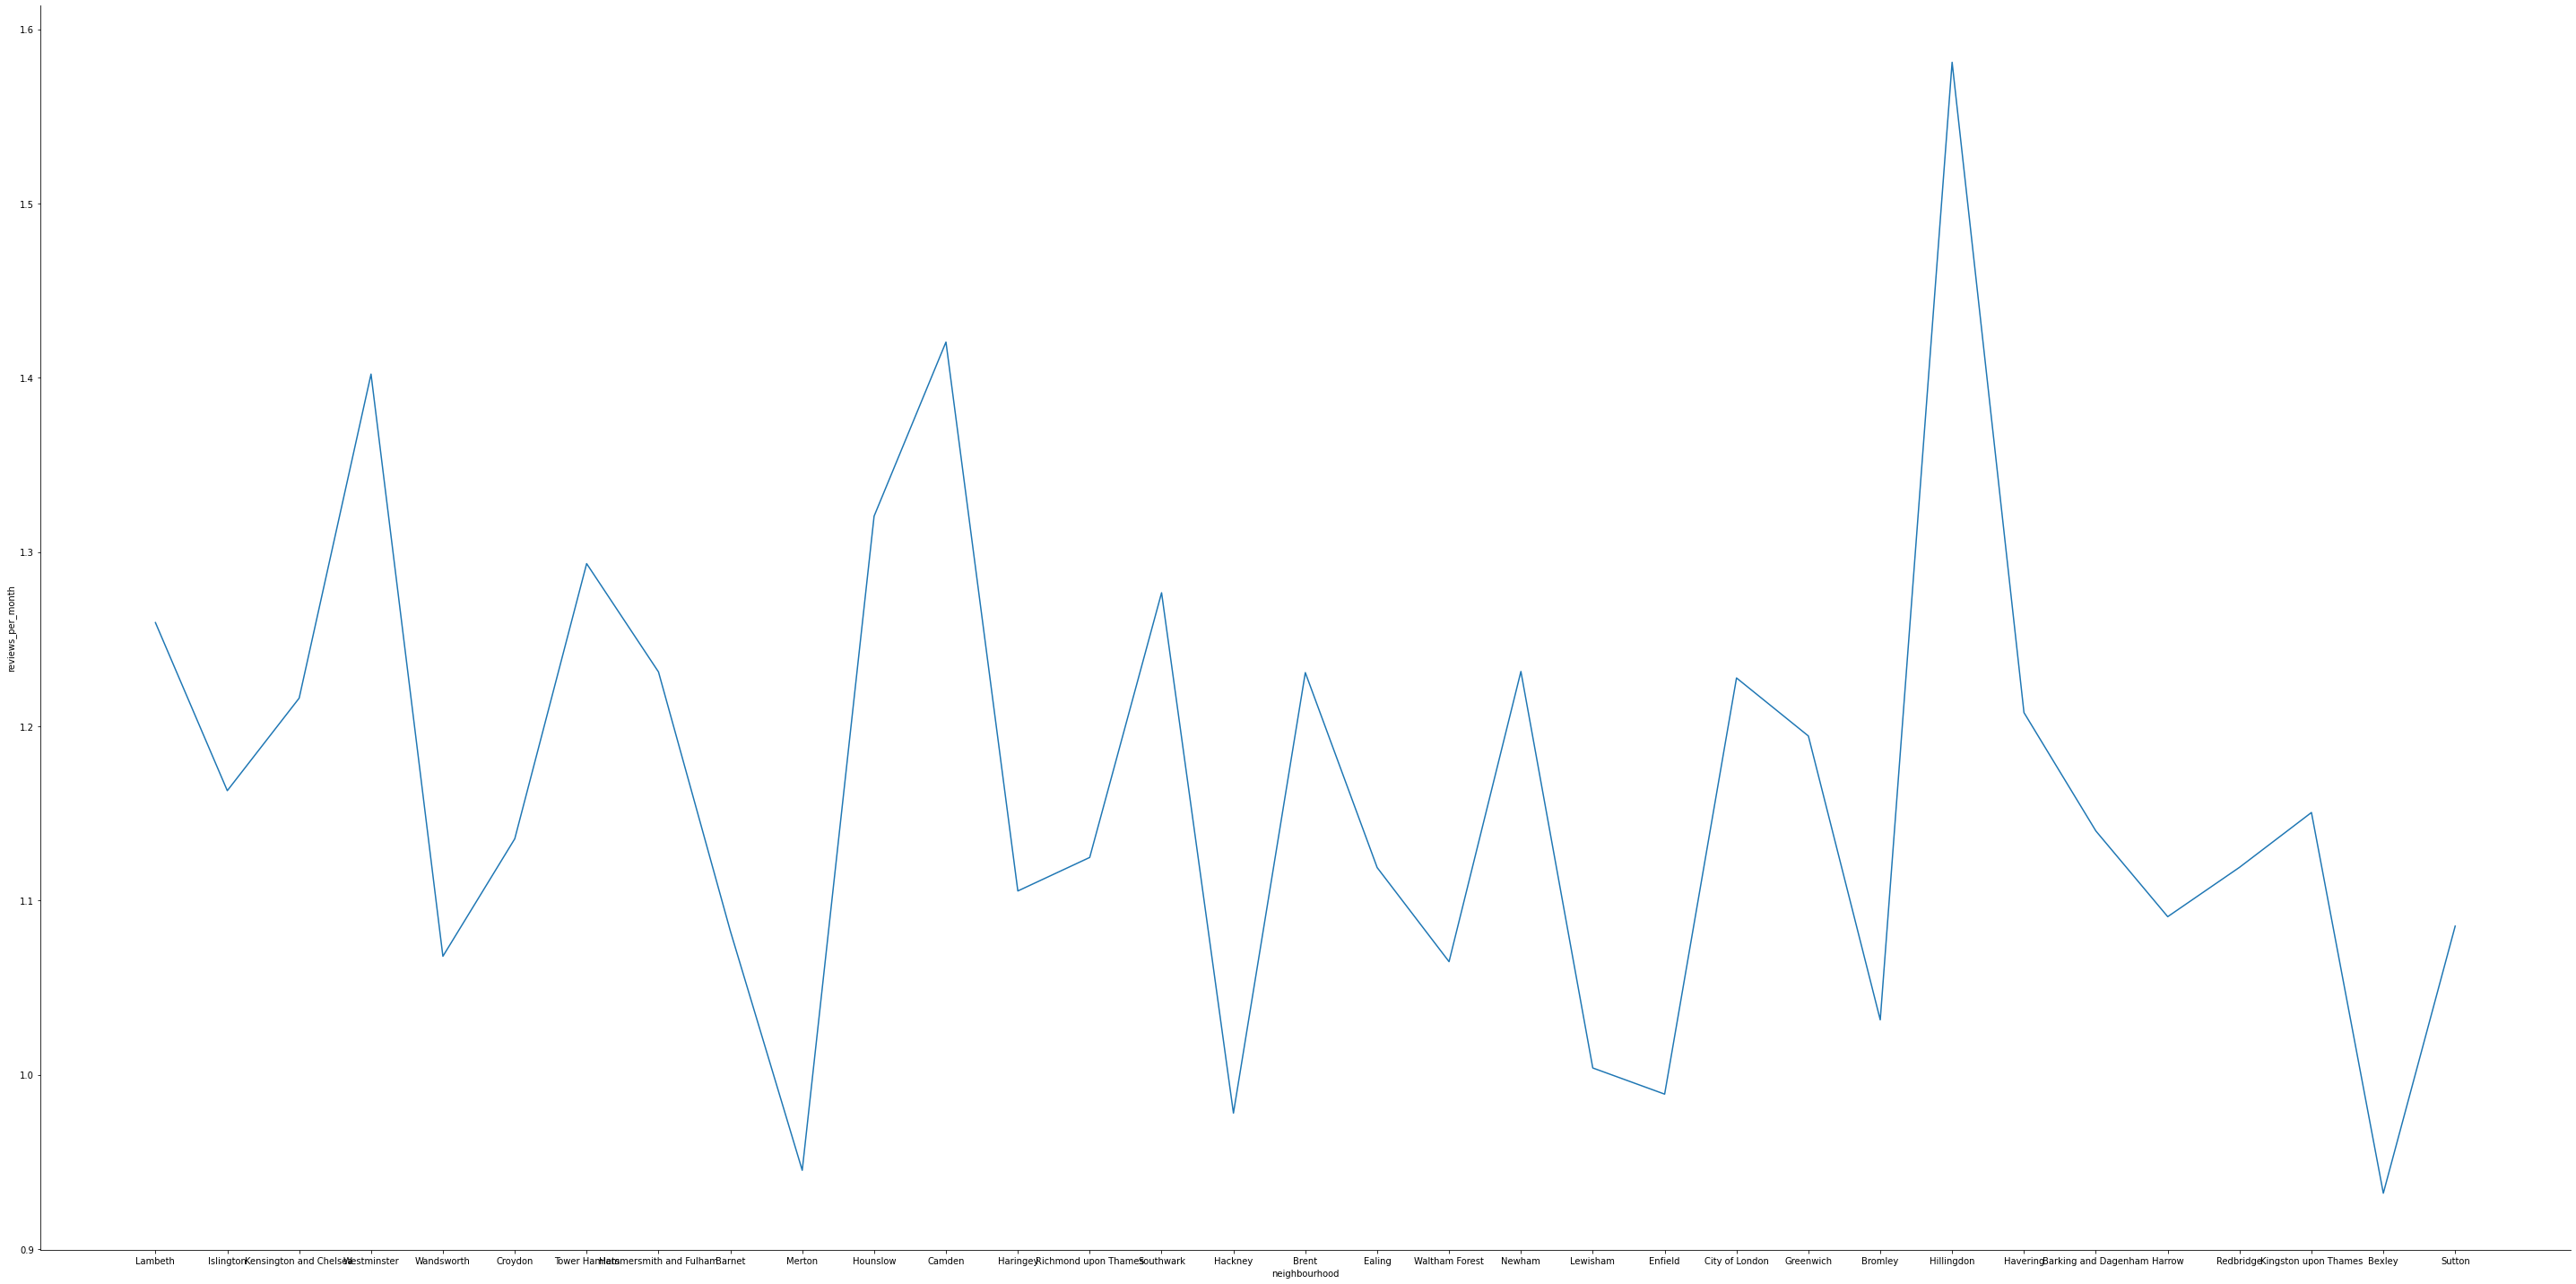

In [41]:
#Los vecindarios con más reseñas y visualización en Londres (sin fecha/año).
sns.relplot(x="neighbourhood", y="reviews_per_month", ci=None, kind="line", data=df1, aspect=2, height=20)

**Se observa:**
+ Los sitios con mayor interacción: Hillindong, Camden, Kensington and Chelsea, Westminster.

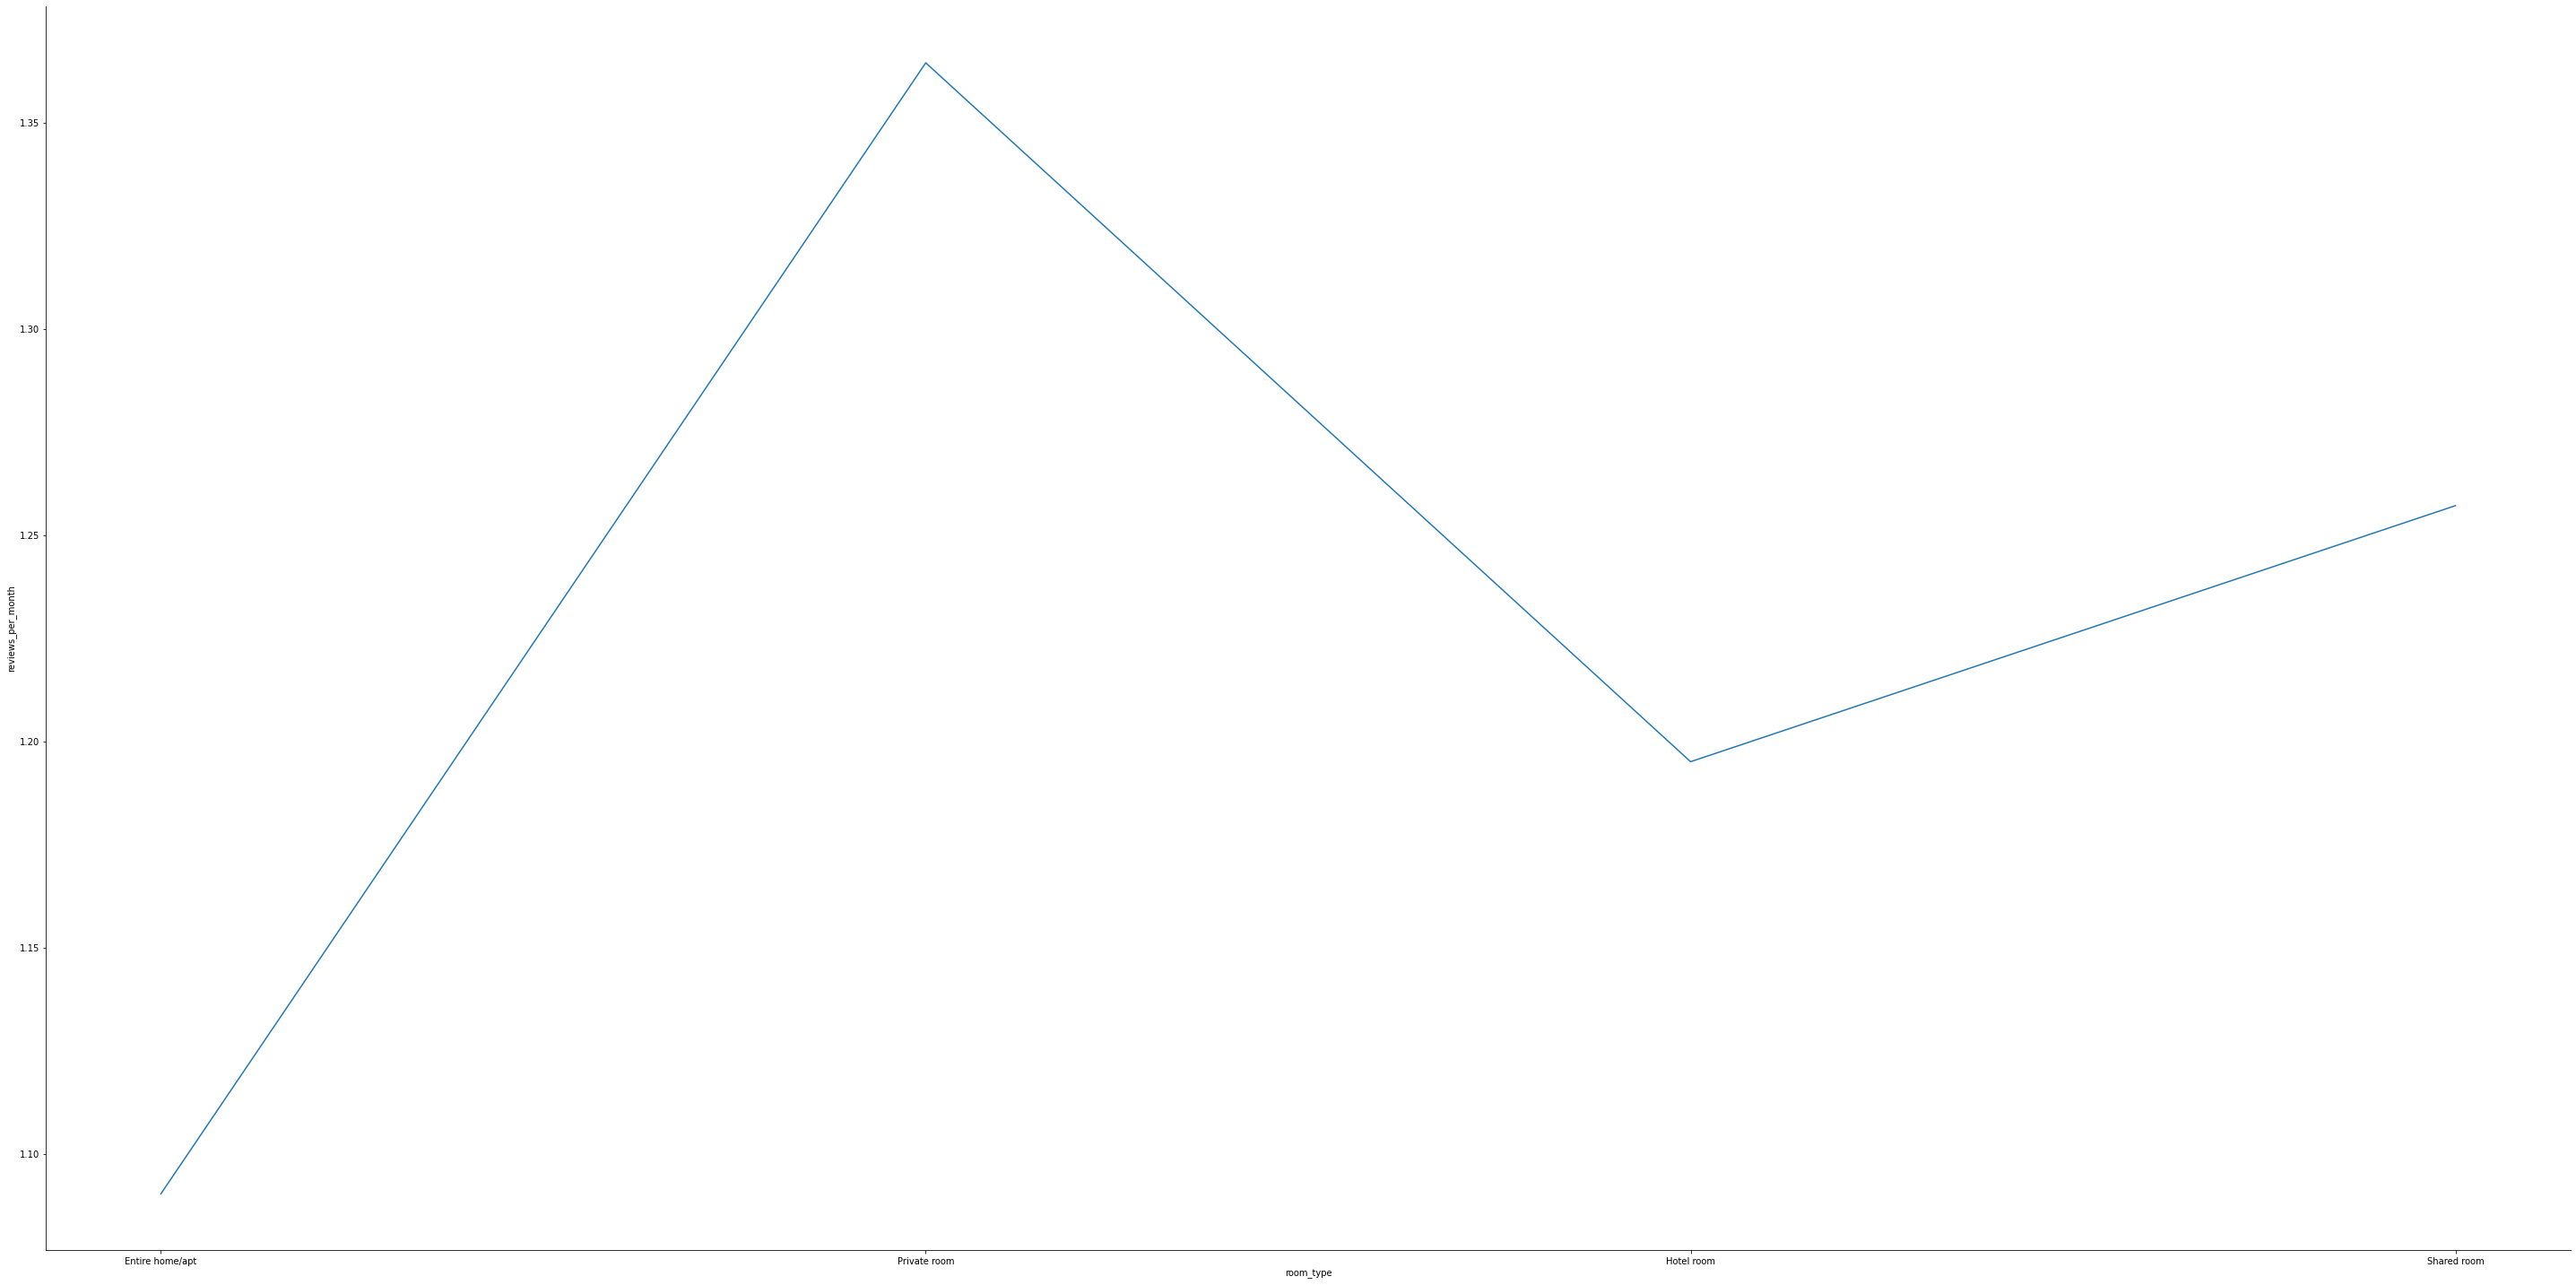

In [42]:
#Reseñas y visualización por tipo de habitación.
sns.relplot(x="room_type", y="reviews_per_month", ci=None, kind="line", data=df1, aspect=2, height=20)

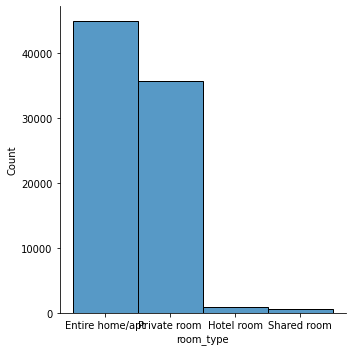

In [43]:
#Conteo de tipos de alojamientos. Oferta de tipos de alojamientos. 
sns.displot(df1['room_type'])

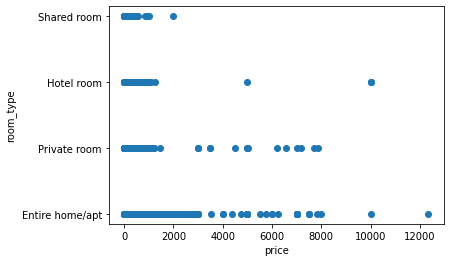

In [44]:
#dependiendo del type_room los precios varían sin importar el barrio (neighbourhood)

plt.scatter(df1["price"], df1["room_type"])
plt.xlabel("price")
plt.ylabel("room_type")
plt.show()

**Se observa:**
+ Se buscan principalmente las habitaciones privadas.

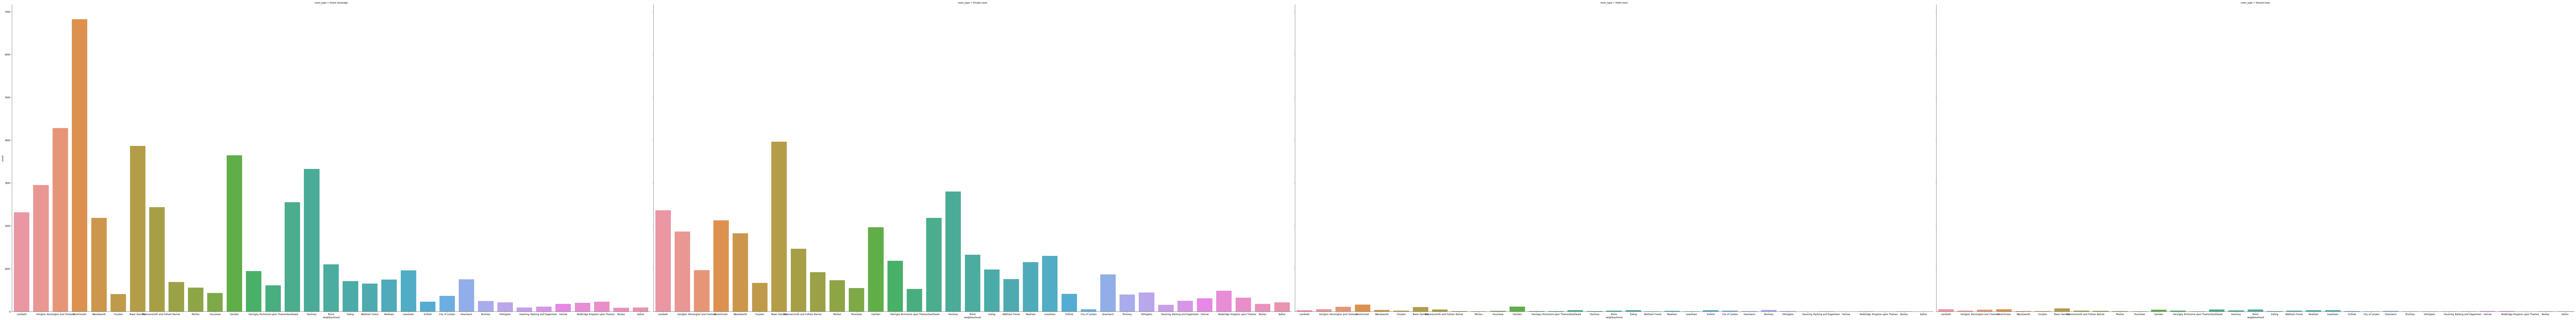

In [45]:
#TIPO DE HABITACIONES OFERTADAS POR VECINDARIO EN LONDRES.
sns.catplot(x ='neighbourhood', kind ='count', col ='room_type', data = df1, aspect=2, height=20)

3. **Relación media negativa:**  number_of_reviews y price. **Hipótesis:** menos precio, más vistas.


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

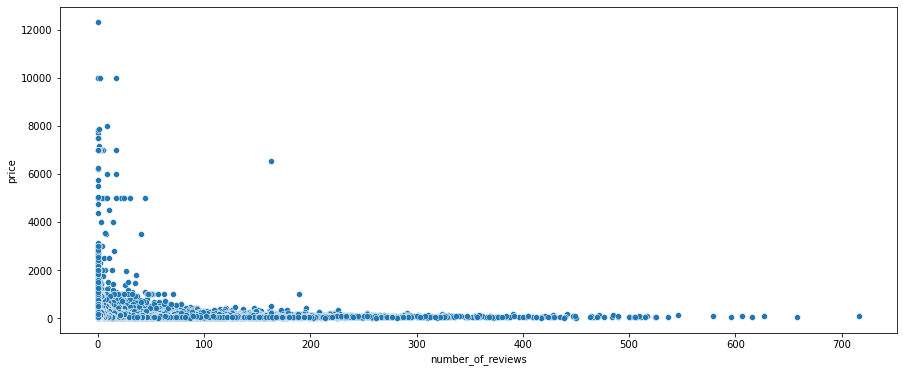

In [46]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df_londres, x= 'number_of_reviews', y ='price')

**Se observa:**
+ Datos atípicos.
+ menos precio, más vistas. Tendencia a economizar.

<AxesSubplot:xlabel='price'>

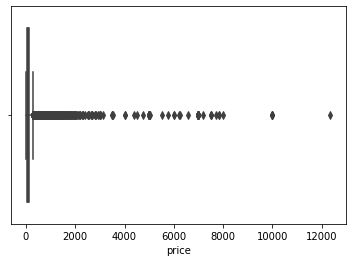

In [47]:
#Analizamos outlier de price
sns.boxplot(x=df_londres["price"])

<AxesSubplot:xlabel='number_of_reviews'>

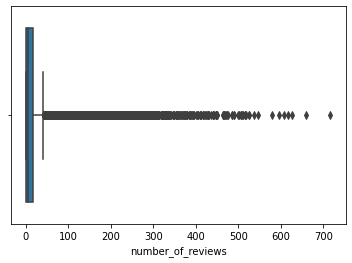

In [48]:
#Analizamos outlier 
sns.boxplot(x=df_londres["number_of_reviews"])

In [49]:
#Filtrar por condiciones: prceio menor de 1000.
df2=df1[df1["price"] < 1000]
df2.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,51.46225,-0.11732,Entire home/apt,88.0,3,185,2019-09-15,1.58,2,336
1,Islington,51.56802,-0.11121,Private room,65.0,1,19,2019-10-07,0.17,2,365
2,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105.0,2,339,2019-07-30,3.33,2,268
3,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100.0,30,88,2019-09-23,0.73,1,158
4,Islington,51.55071,-0.08547,Private room,77.0,1,207,2019-10-21,2.04,2,336


**NOTA:** **ESTABLECER VALORES MÍNIMOS**, EVALUAR VALORES MÁXIMOS.

In [50]:
#Filtrar por condiciones: number_of_reviews menor a 550
df3=df2[df2["number_of_reviews"] < 550]
df3.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,51.46225,-0.11732,Entire home/apt,88.0,3,185,2019-09-15,1.58,2,336
1,Islington,51.56802,-0.11121,Private room,65.0,1,19,2019-10-07,0.17,2,365
2,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105.0,2,339,2019-07-30,3.33,2,268
3,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100.0,30,88,2019-09-23,0.73,1,158
4,Islington,51.55071,-0.08547,Private room,77.0,1,207,2019-10-21,2.04,2,336


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

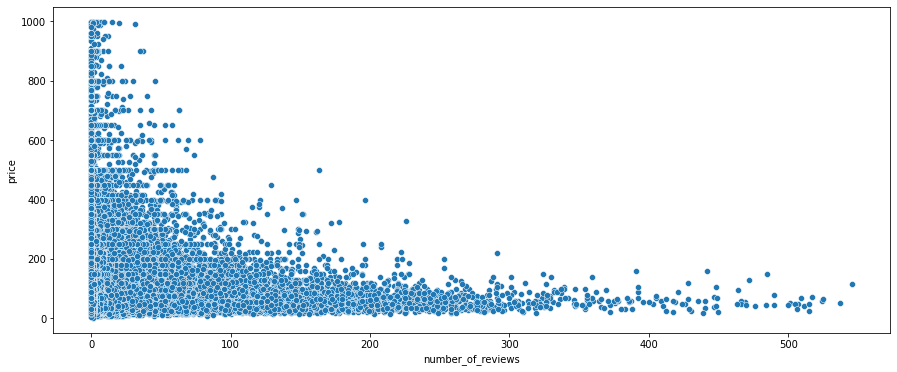

In [51]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df3, x= 'number_of_reviews', y ='price')

**NOTA:** A menor precio, más vistas.

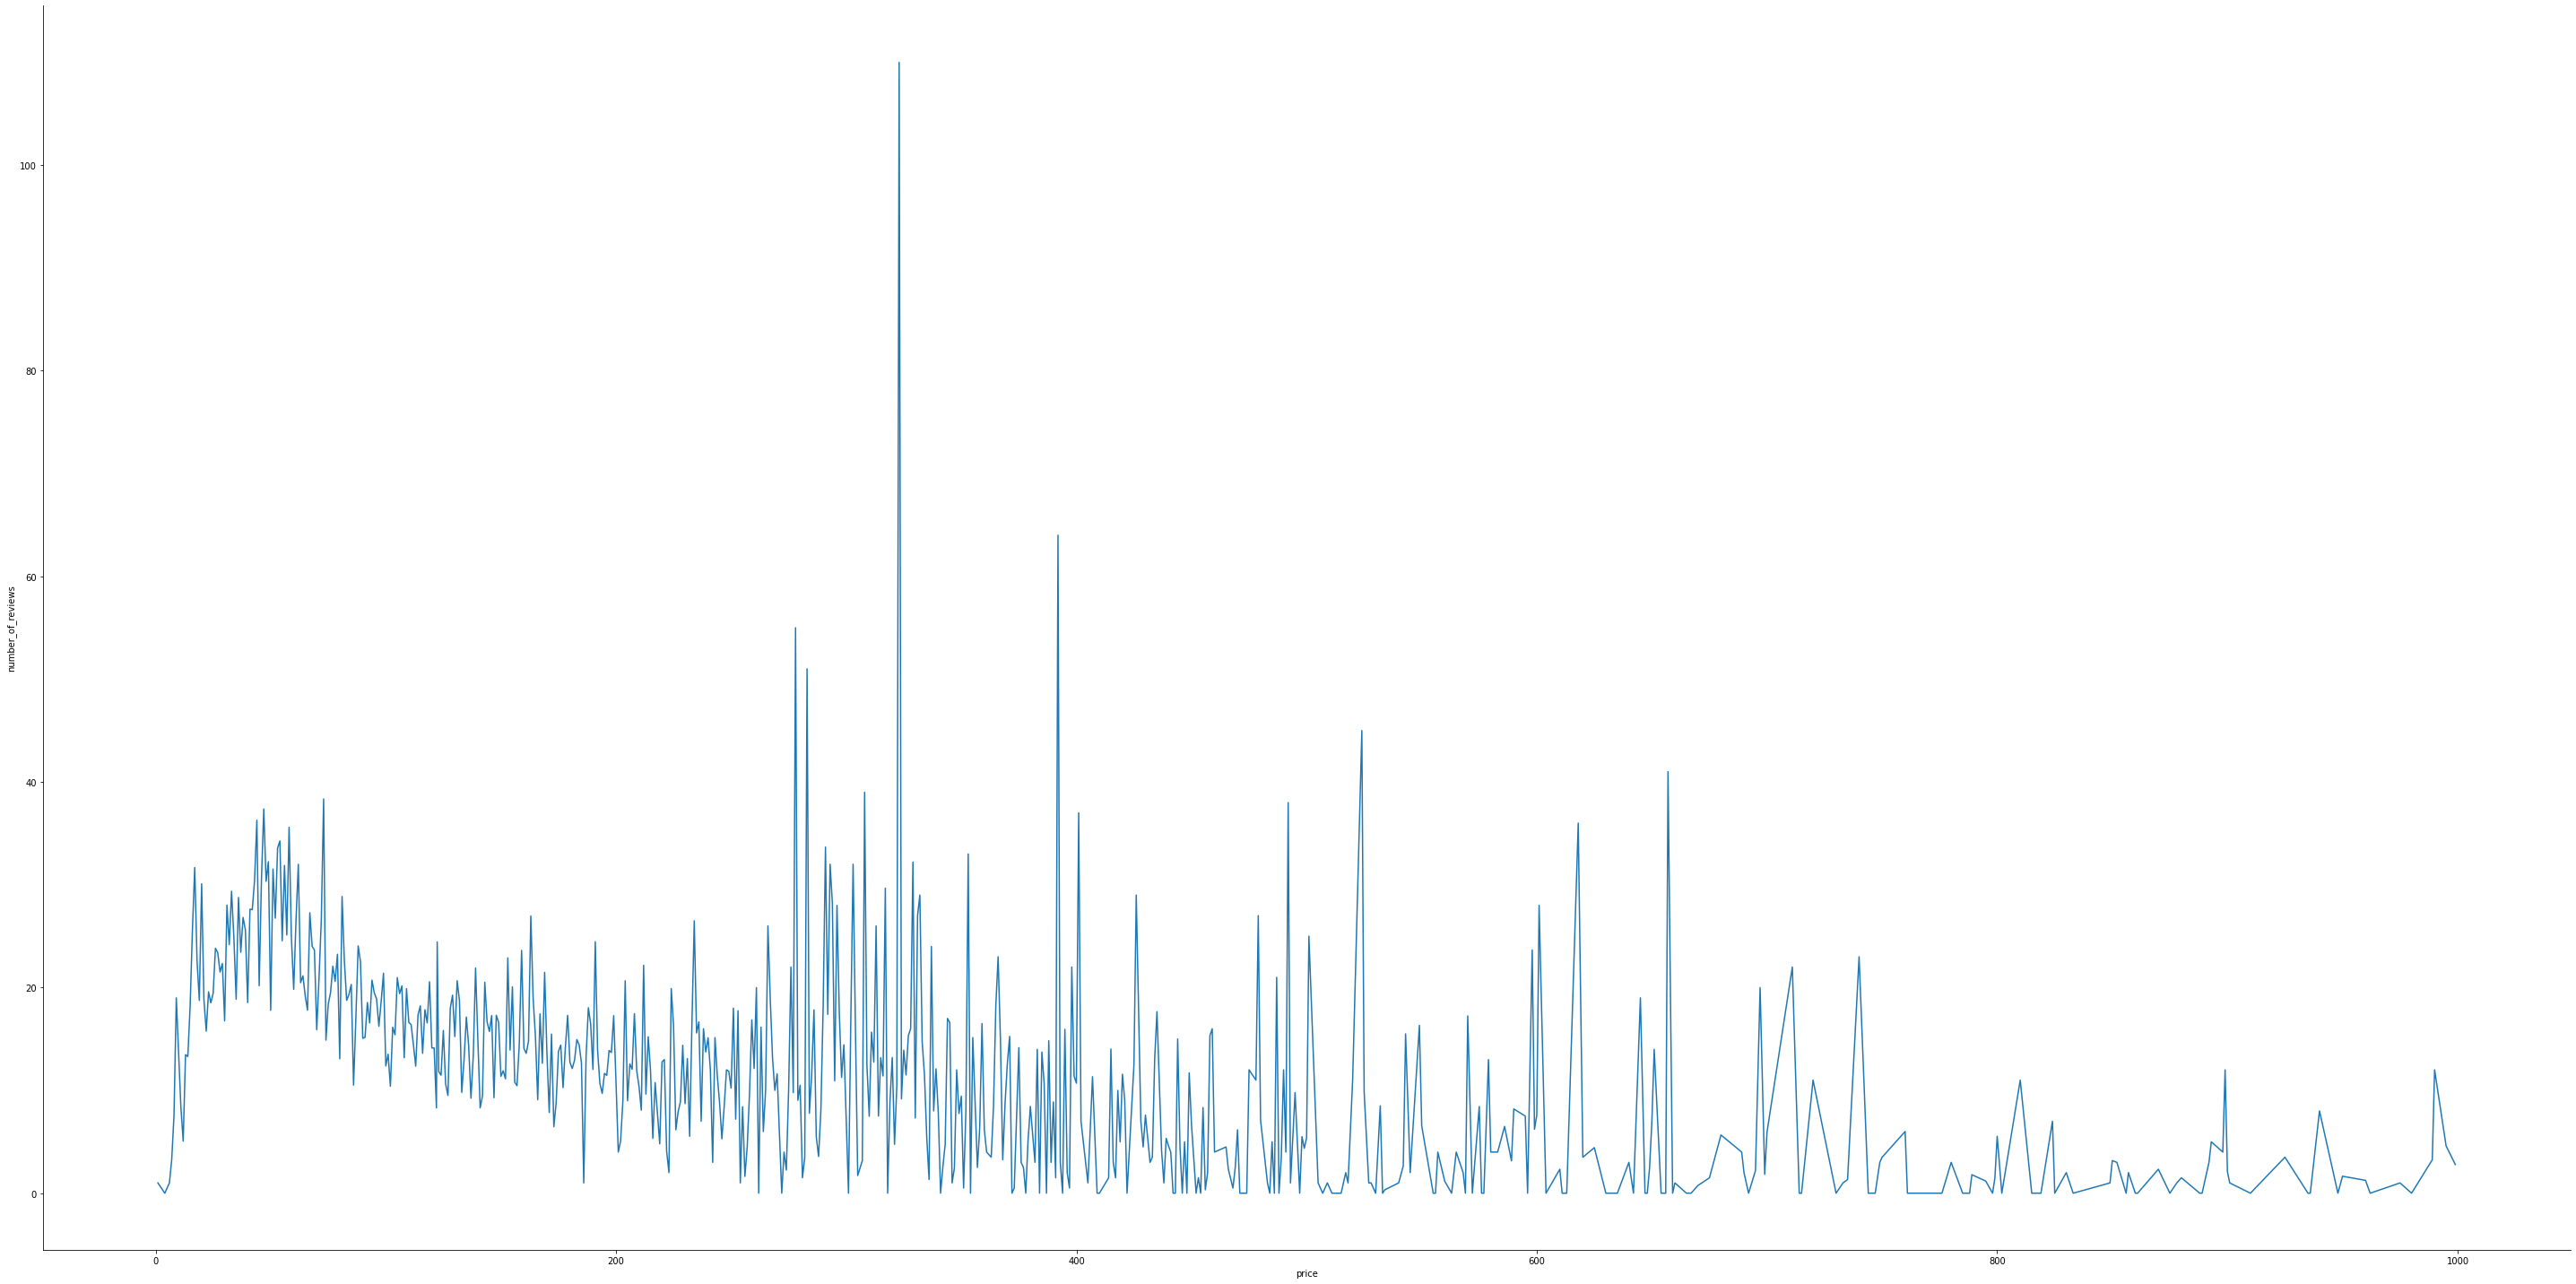

In [52]:
#A menor precio, más revisiones.
sns.relplot(x="price", y="number_of_reviews", ci=None, kind="line", data=df3, aspect=2, height=20)

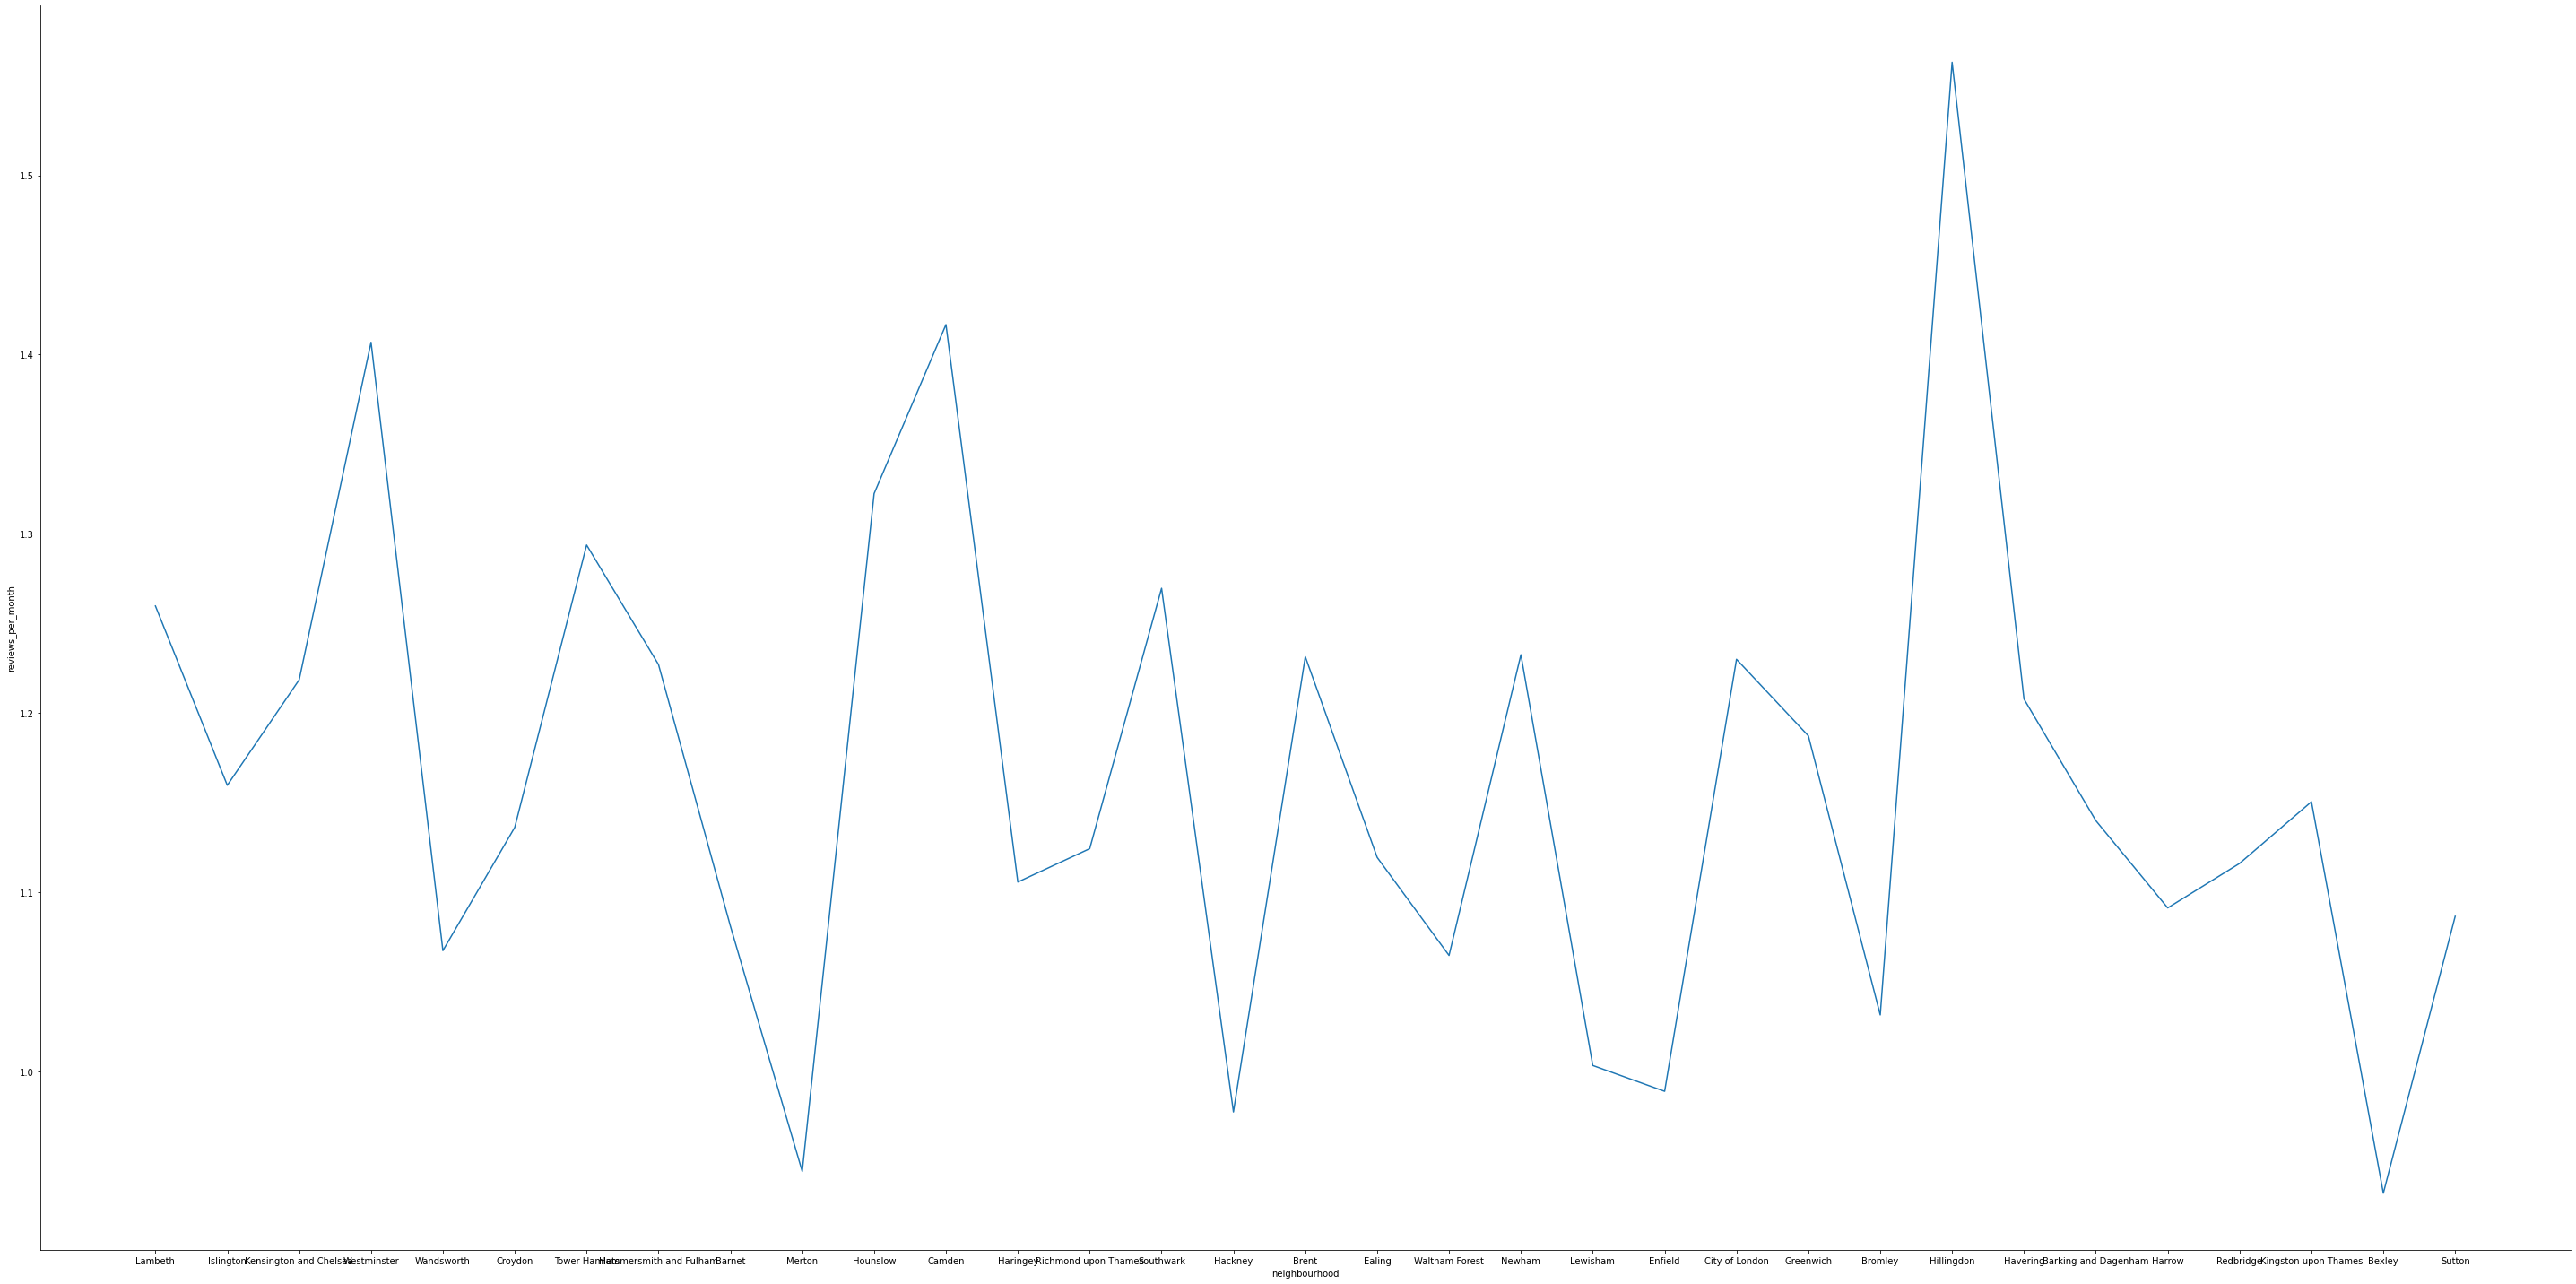

In [53]:
#Revisiones por mes por vecindario.
sns.relplot(x="neighbourhood", y="reviews_per_month", ci=None, kind="line", data=df3, aspect=2, height=20)

**Se observa:**
+ Los sitios más buscados(comentados) por vecindario: Hillindong, Camden y Westminster. Evaluar.

4. **Relación media negativa:** availability_365 y minimun_nights. **Hipótesis:** al tener más/menos días como mínimo de alojamiento hay menos/más dias disponibles anuales. 

Se descarta.

<AxesSubplot:xlabel='availability_365', ylabel='minimum_nights'>

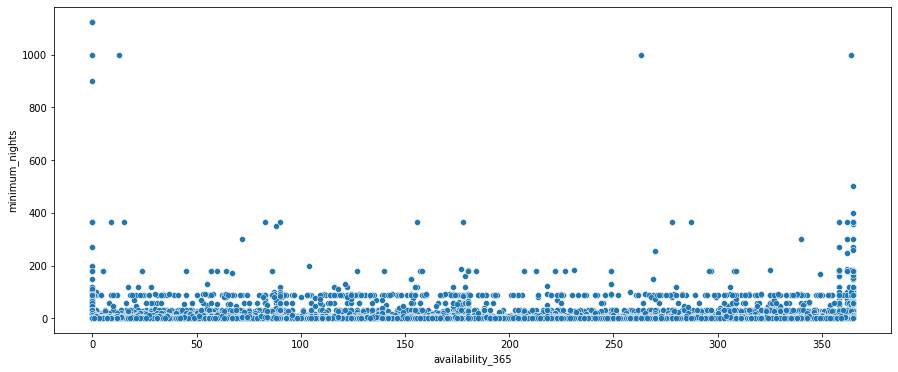

In [54]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df3, x= 'availability_365', y ='minimum_nights')

**Se observa:**
+ Datos atípicos.

<AxesSubplot:xlabel='minimum_nights'>

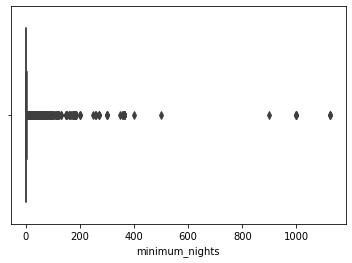

In [55]:
#Analizamos outlier de minimum_nights
sns.boxplot(x=df3["minimum_nights"])

In [56]:
#Filtrar por condiciones: 
df4=df3[df3["minimum_nights"] < 100]
df4.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,51.46225,-0.11732,Entire home/apt,88.0,3,185,2019-09-15,1.58,2,336
1,Islington,51.56802,-0.11121,Private room,65.0,1,19,2019-10-07,0.17,2,365
2,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105.0,2,339,2019-07-30,3.33,2,268
3,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100.0,30,88,2019-09-23,0.73,1,158
4,Islington,51.55071,-0.08547,Private room,77.0,1,207,2019-10-21,2.04,2,336


<AxesSubplot:xlabel='availability_365', ylabel='minimum_nights'>

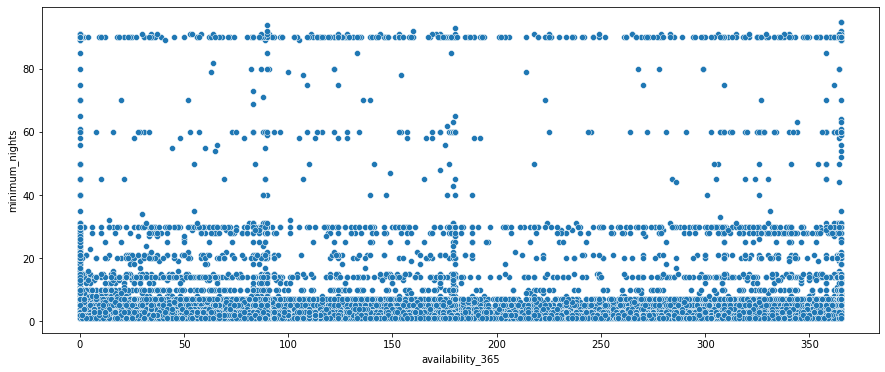

In [57]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df4, x= 'availability_365', y ='minimum_nights')

**NOTA:** **se filtra por condiciones con los valores de minimum_nights menores a 100.** Relación de variables baja.

5. **Relación media negativa:** calculated_host_listings_count y minimum_nights. **Hipótesis:** al tener más alojamientos un host oferta menos días como "minimum_nights". 

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='minimum_nights'>

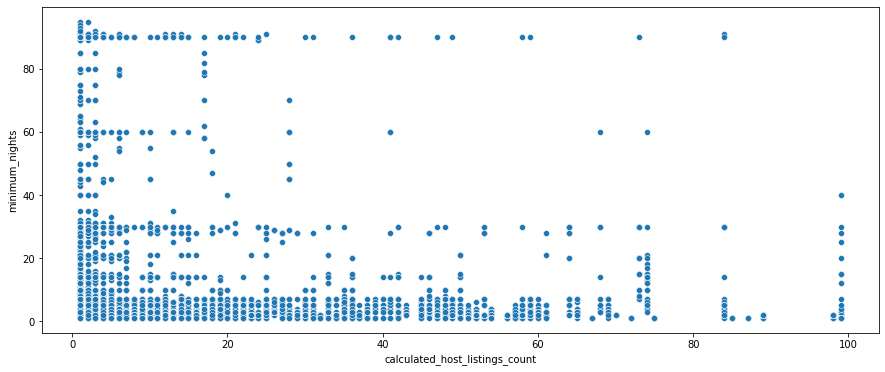

In [58]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df4, x= 'calculated_host_listings_count', y ='minimum_nights')

**Se observa:**
+ Outlier.

+ a menos alojamientos por host, mayor número de días de "minimum_nights" y viceversa. Siendo la hipótesis: que al no poder cubrir su disponibilidad anual por tener menos host aumenta la condición de mínimas noches de hospedaje. 
+ Mendos datos para comprobar la hipótesis.
+ Limpiar outlier. De 0 a 50 mayor cantidad de datos.

**Los vecindarios y minimum nights**

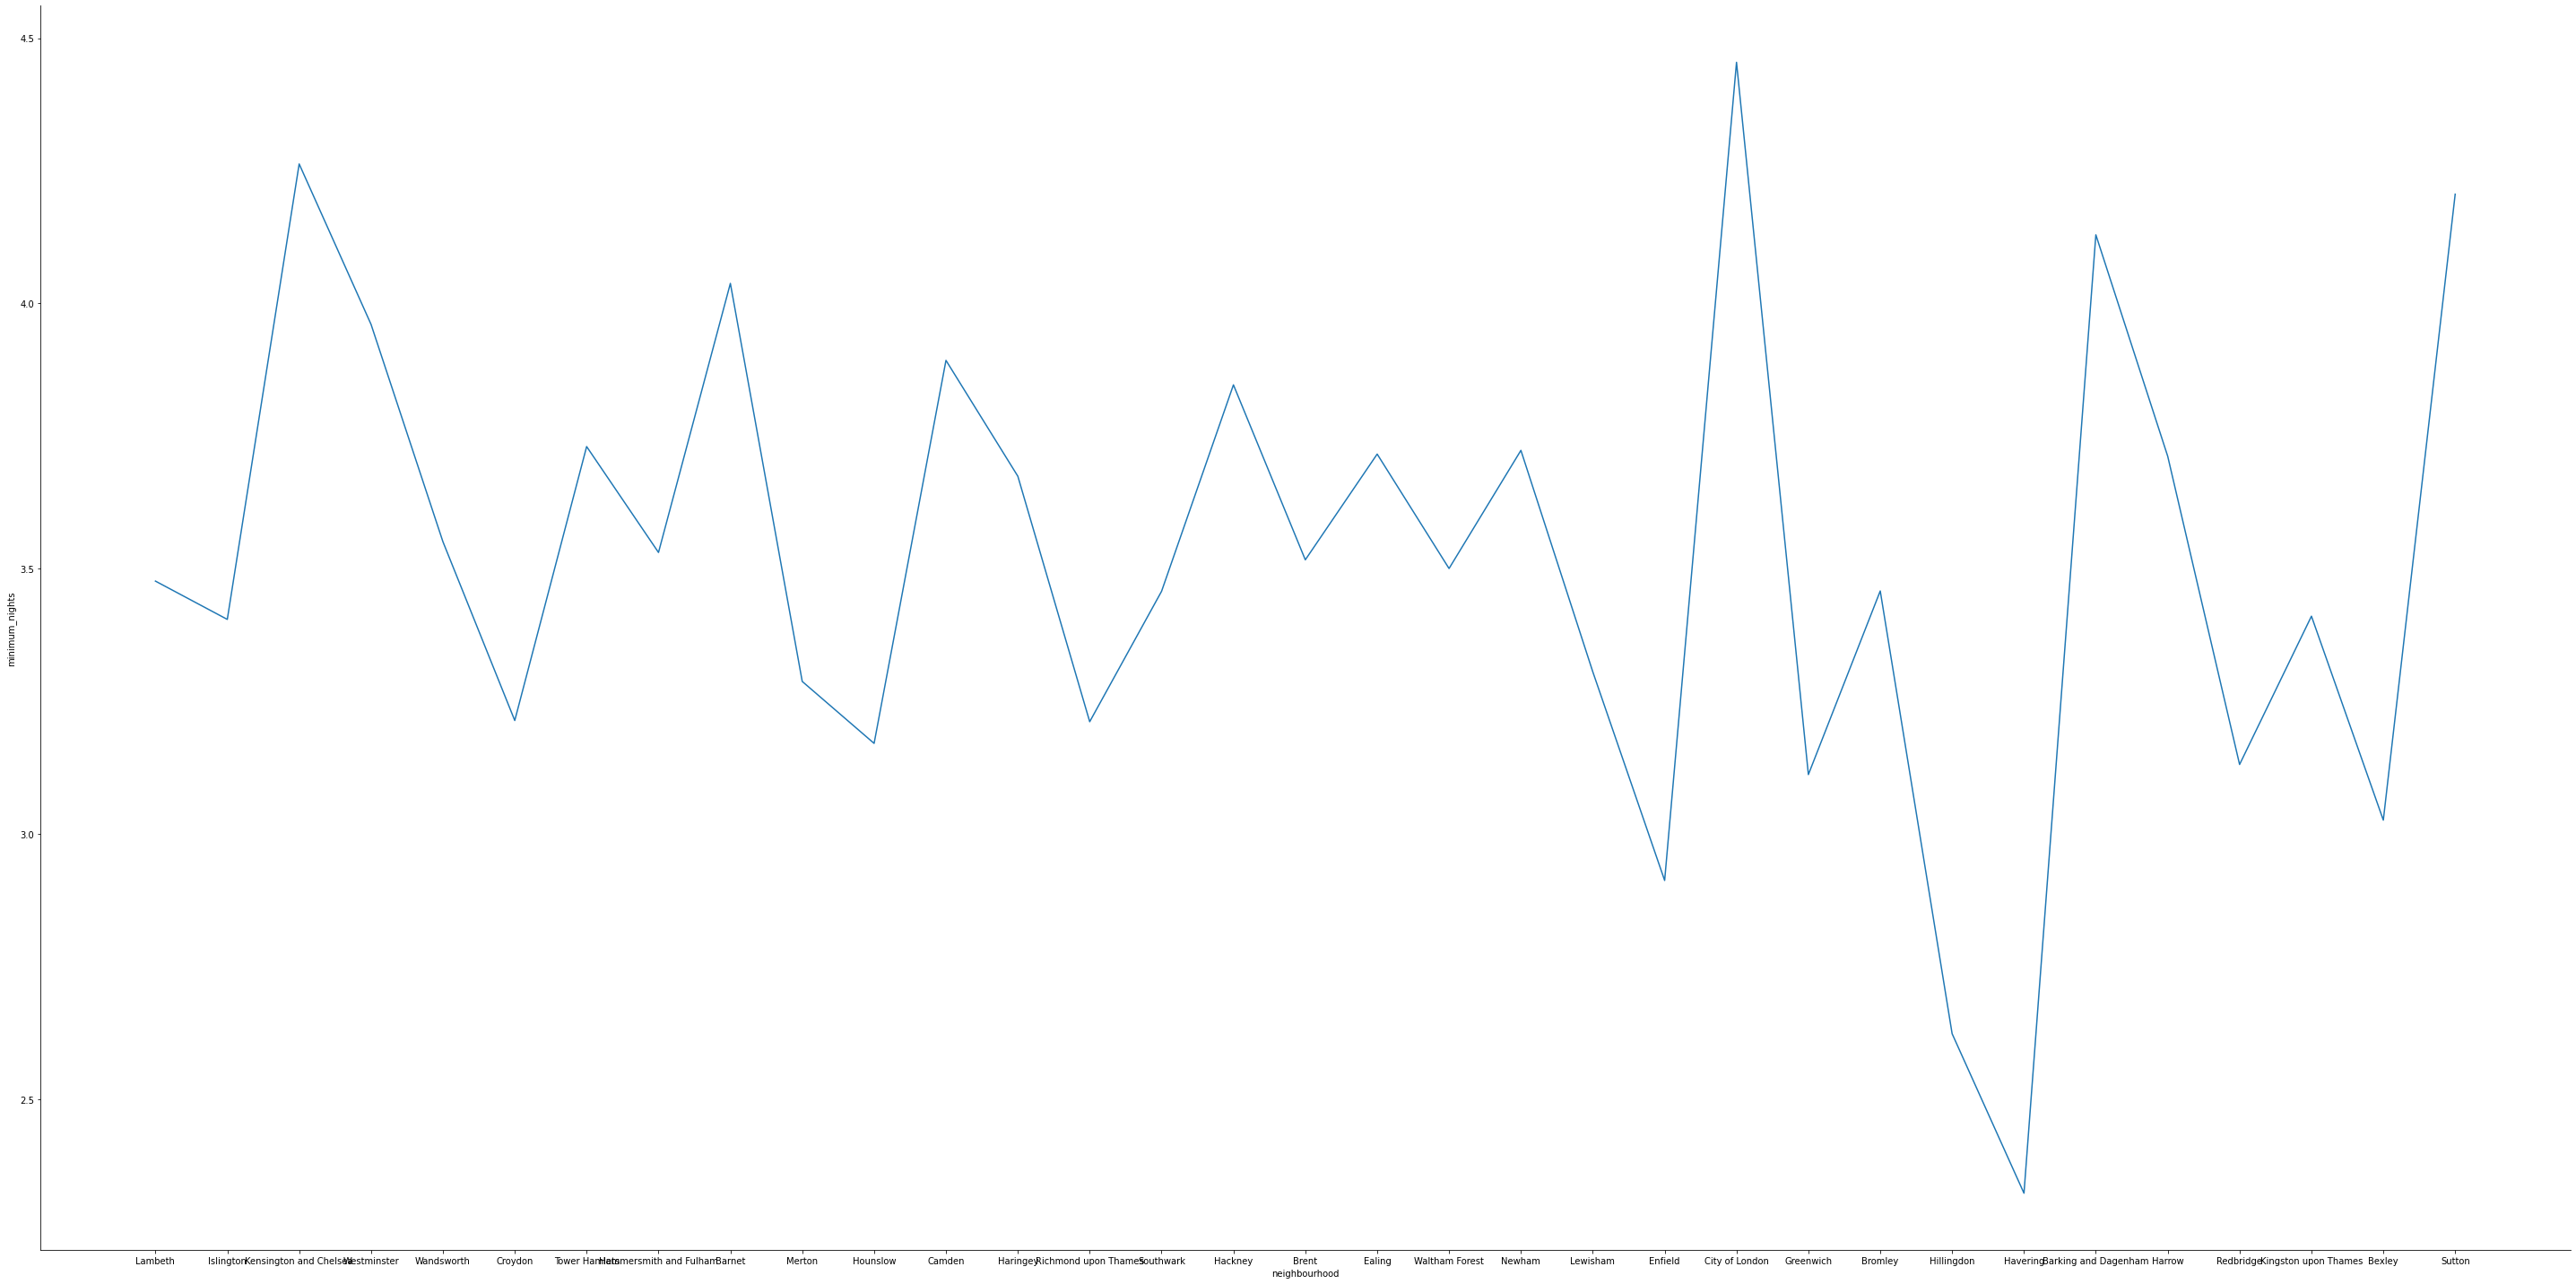

In [59]:
sns.relplot(x="neighbourhood", y="minimum_nights", ci=None, kind="line", data=df4, aspect=2, height=20)

**NOTA:** recomendación de inversión en barrios con poca oferta de alojamientos.

**Se observa:**
+ City of London  es la ciudad con más de "minimum_nights", lo que nos podría decir que hay menos alojamientos de los hosts.
+ En Havering, sucede lo contrario, hay menos noches de "minimum_nights" lo que nos diría que hay más alojamientos de los hosts en esas barrio. Le sigue Hillingdon, Enfield, Bexley, Hounslow. Serían las cinco principales barrios.

7. **Relación moderada negativa:** reviews_per_month y minimum_nights. **Hipótesis:** a menos noches mínimas de alojamiento mayor vistas por mes. Tipo de viajeros.

<AxesSubplot:xlabel='number_of_reviews', ylabel='minimum_nights'>

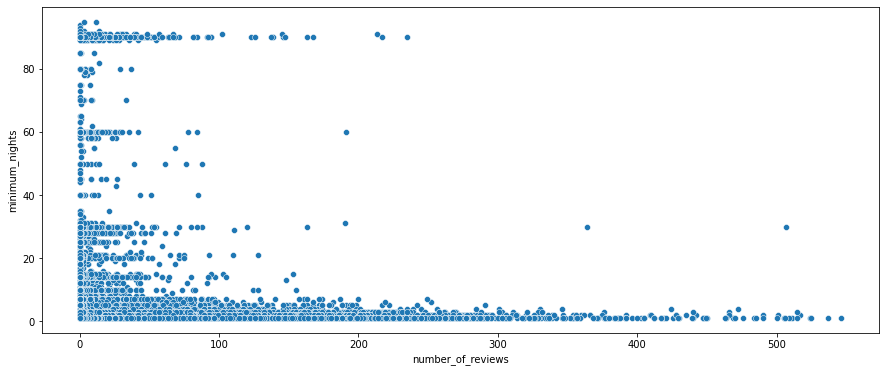

In [81]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df4, x= 'number_of_reviews', y ='minimum_nights')

<AxesSubplot:xlabel='reviews_per_month', ylabel='minimum_nights'>

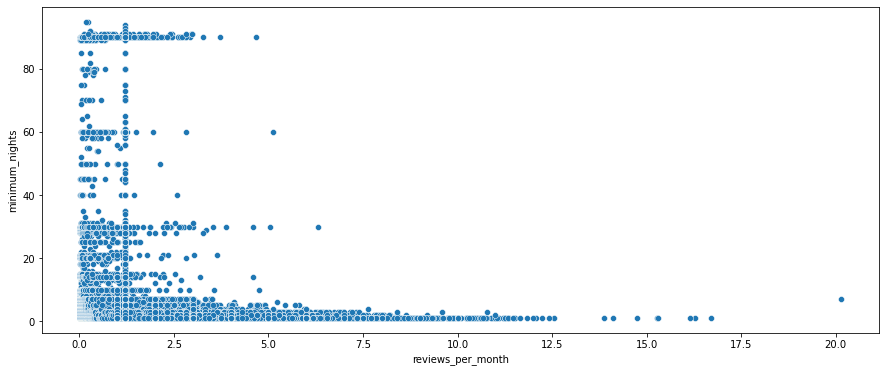

In [60]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df4, x= 'reviews_per_month', y ='minimum_nights')

**Se observa:**
+ A menos noches mínimas del alojamiento mayor vistas por mes.
+ Probar mínimo de noches con price (posible hipótesis).

**Tipos de viajeros**

In [61]:
#bins = [0,5,20,90]
#label = ['volátil', 'intermedio', 'duradero']

In [62]:
#df4['minimum_nights'] = pd.cut(df4['minimum_nights'],bins,labels=labels)
#df.head()

In [63]:
# Definir tipo de viajeros. Documentarse sobre bins.
#labels = ["volátil", "intermedio", "estable"]
#bins = [0,5,20,90]
#df["minimum_nights"] = pd.cut(df["minimum_nights"], bins=bins, labels=labels)

#sns.catplot(data=df4, x="minimum_nights", kind="count")

6. **Relación media negativa:** calculated_host_listings_count y longitude, availability_365 y longitude, availability_365 y latitude,price y latitude. **Hipótesis:** A mayor/menor longitud/latitude puede variar la cantidad de alojamientos por host, la disponibilidad anual y el precio.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

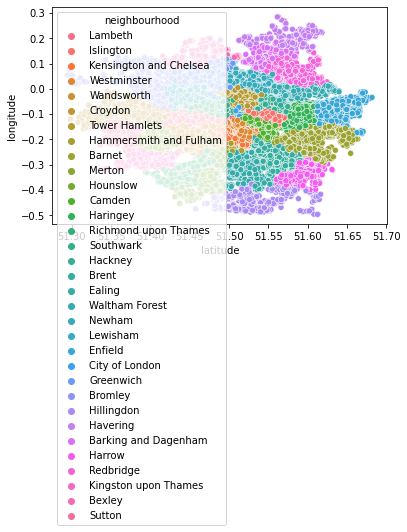

In [64]:
sns.scatterplot(data=df_londres, x="latitude", y="longitude", hue="neighbourhood")

**CATEGÓRICAS**

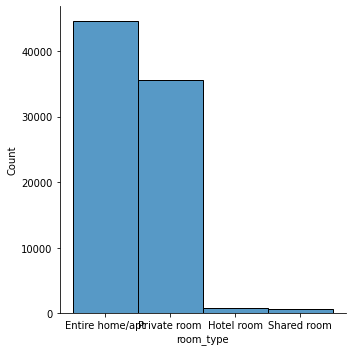

In [65]:
#Conteo de tipos de alojamientos. 
sns.displot(df4['room_type'])

___
# **RESUMEN**
**PREGUNTAS:**
1. Cuál es la tendencia de los viajeros: la exclusividad o economizar en alojamientos?
2. Cuáles son los vecindarios y tipo de alojamiento con mayor interacción?
3. Cuáles es el tipo de alojamiento con mayor oferta en los vecindarios de Londres?
4. De qué forma interactúa 

Pendiente: longitud/latitud: ubicación y características geográficas de los vecindarios de Londres.

**1. Cuál es la inclinación de los viajeros: la exclusividad o economizar en alojamientos?**

Tomar en cuenta:
+ Nos basamos en la relación de number_of_reviews (vistas) y reviews_per_month (reseñas). Relación media positiva. *Usamos esta relación como un indicador de la demanda debido a la interacción o el tráfico en la plataforma 

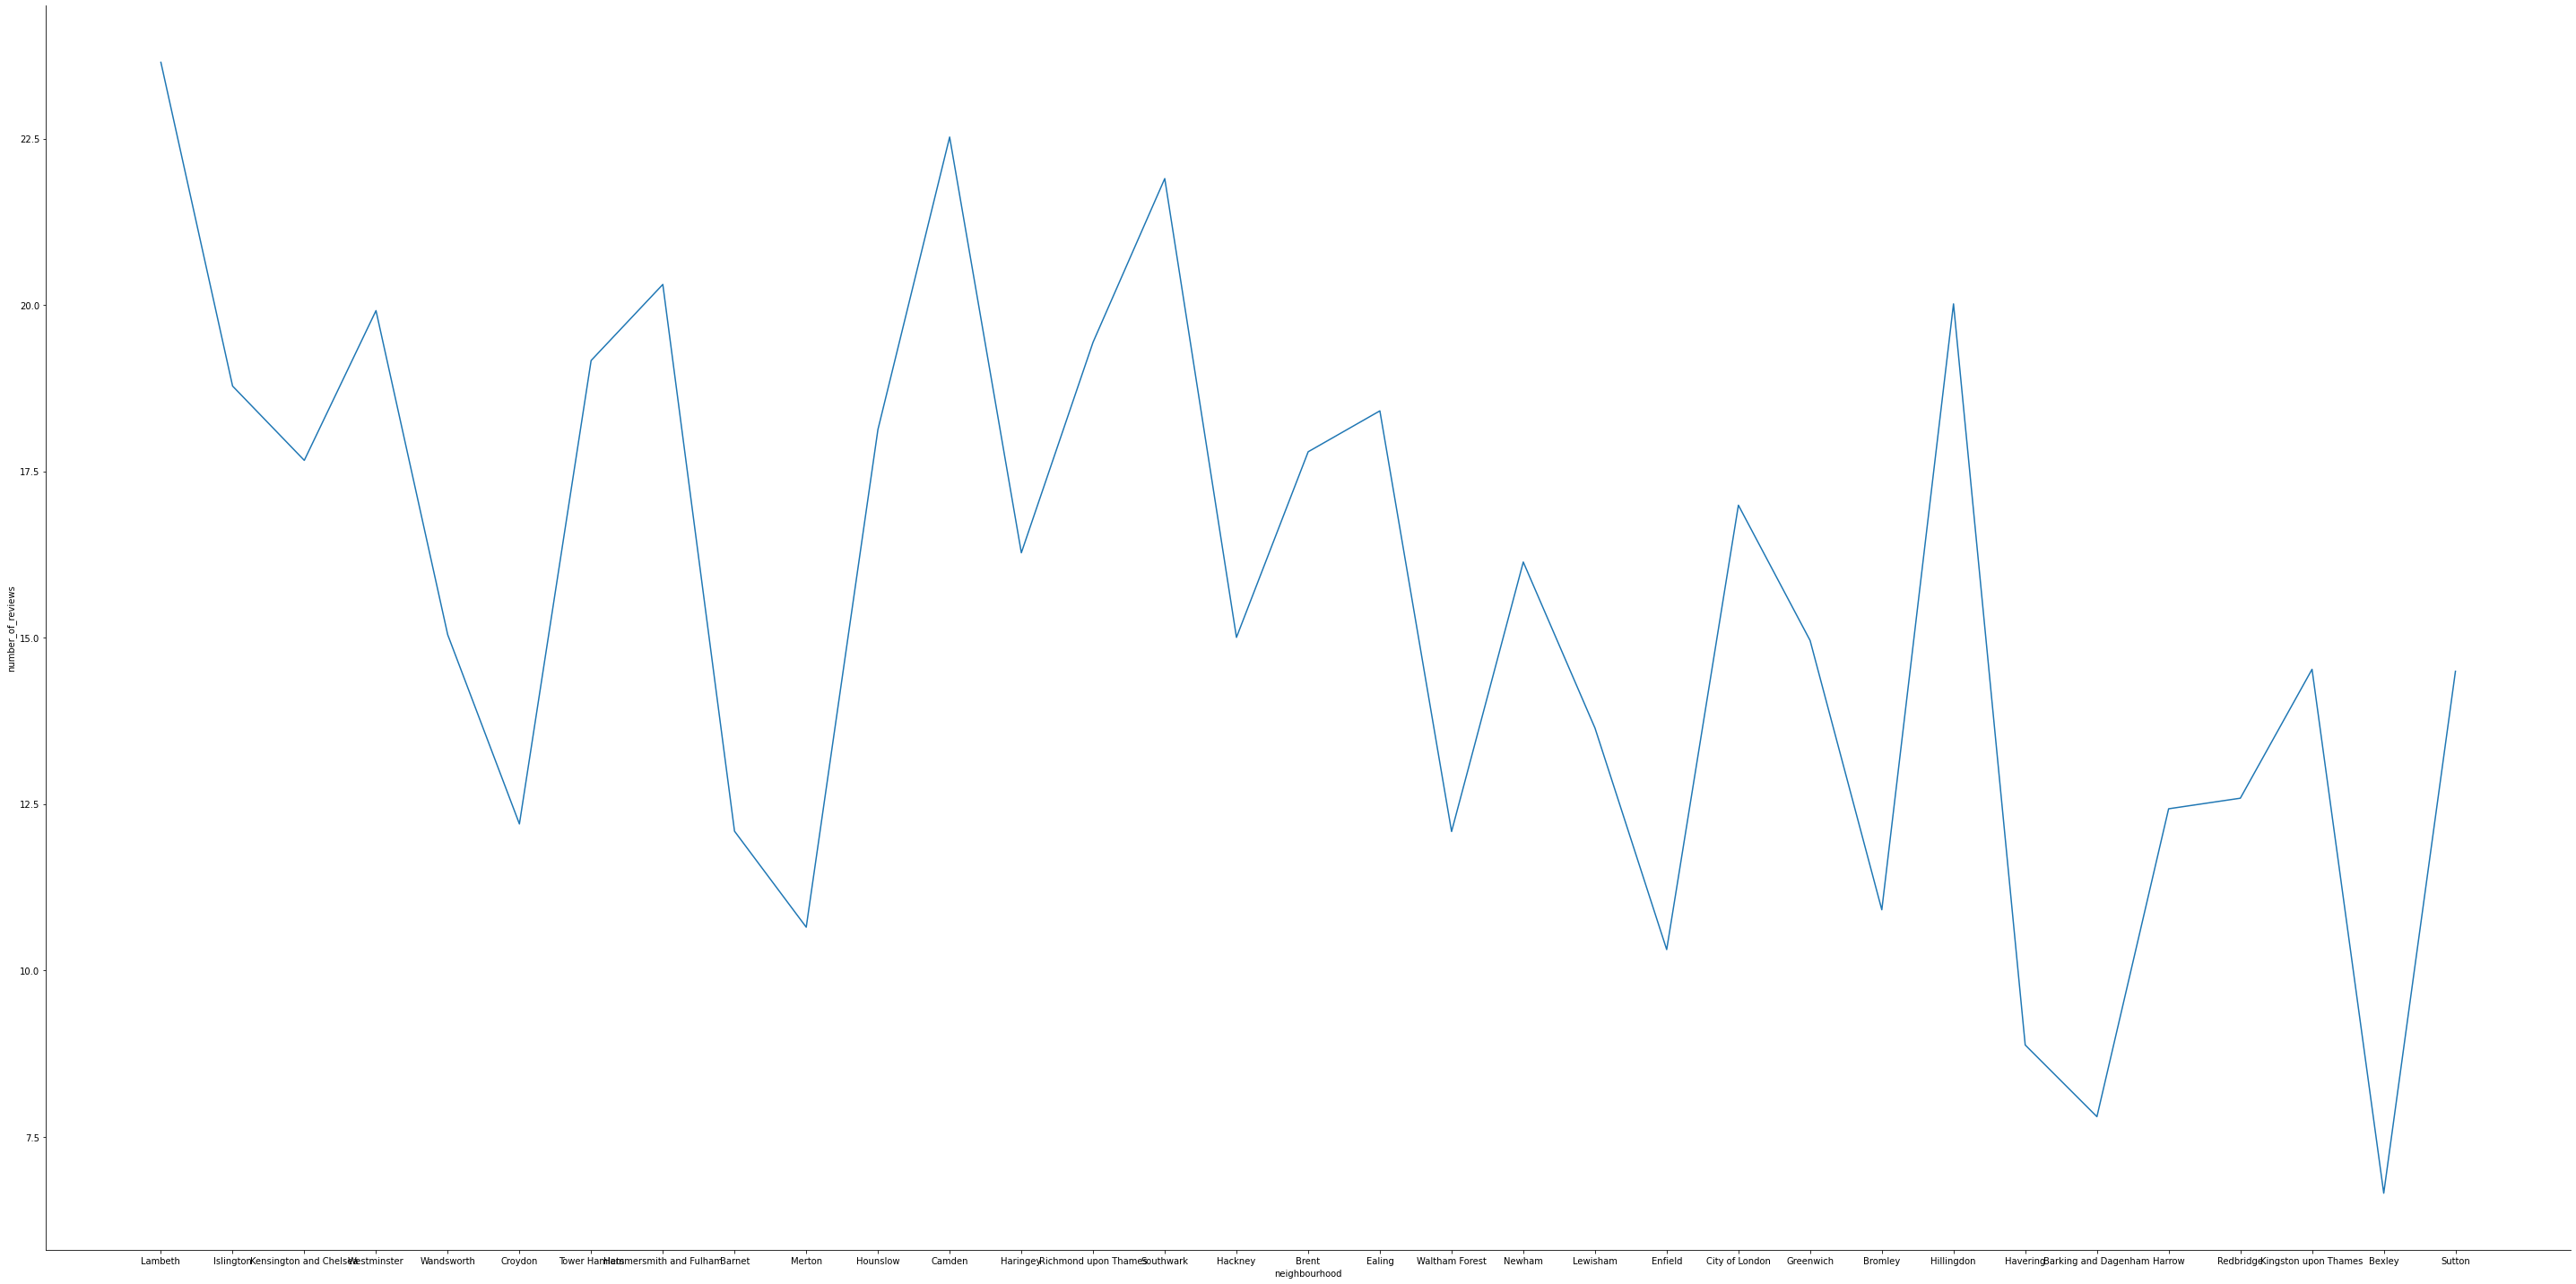

In [80]:
#Vistas.
sns.relplot(x="neighbourhood", y="number_of_reviews", ci=None, kind="line", data=df4, aspect=2, height=20)

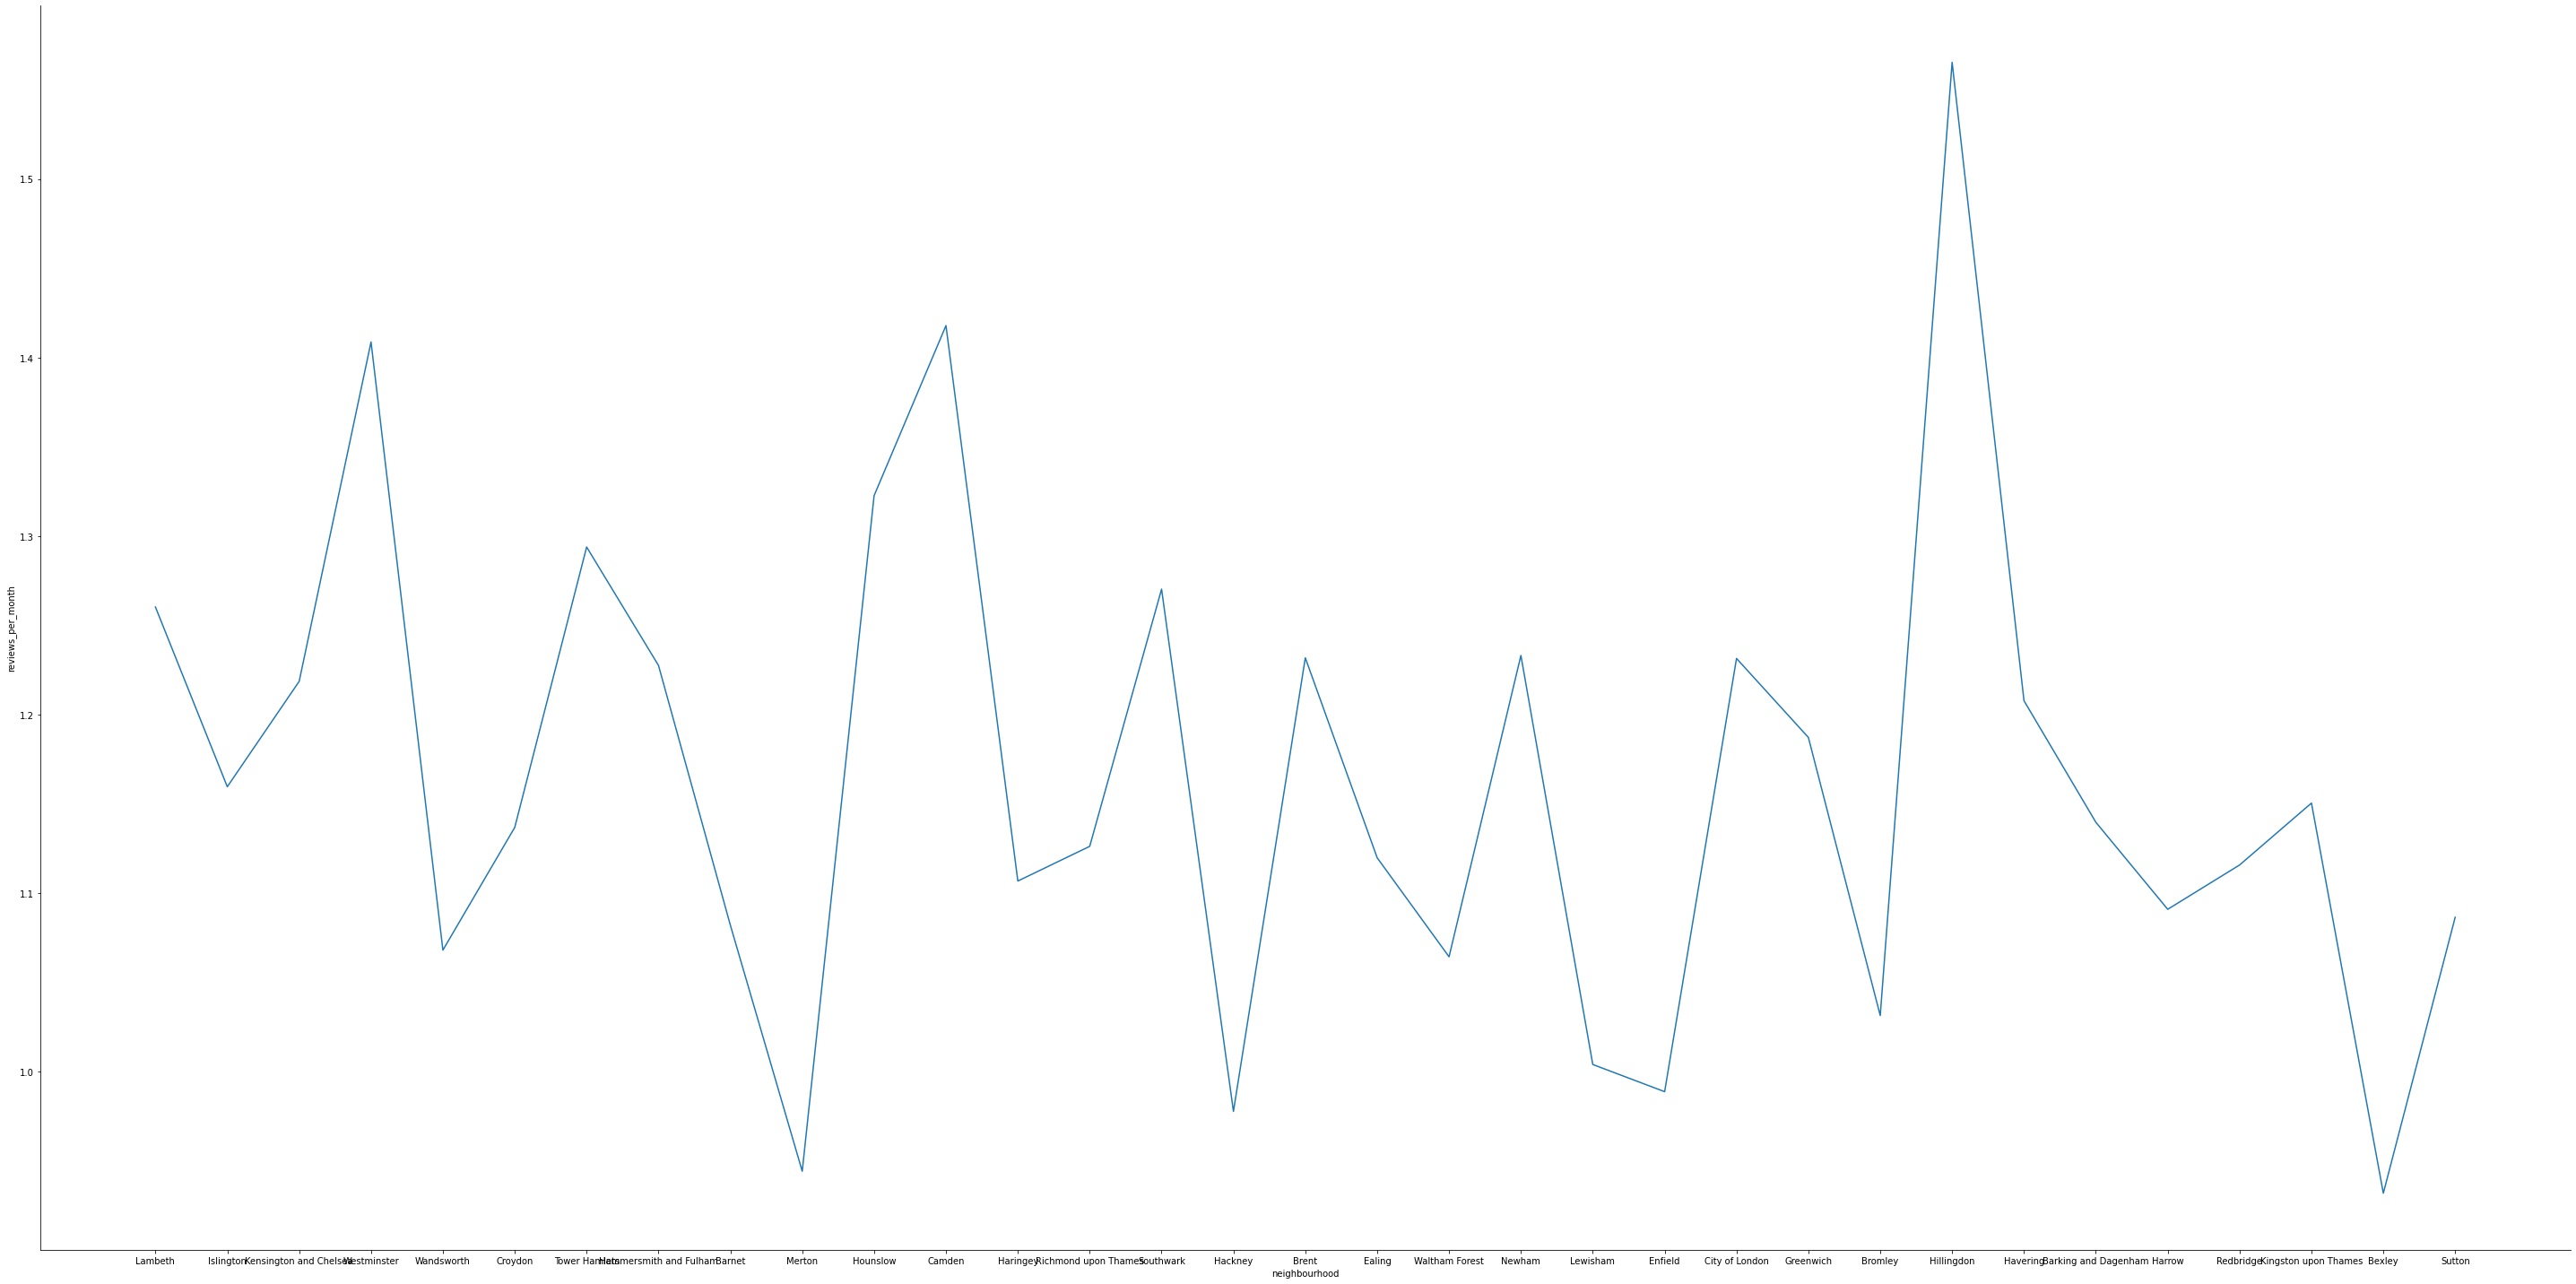

In [78]:
#Reseñas por mes por vecindario. 
sns.relplot(x="neighbourhood", y="reviews_per_month", ci=None, kind="line", data=df4, aspect=2, height=20)

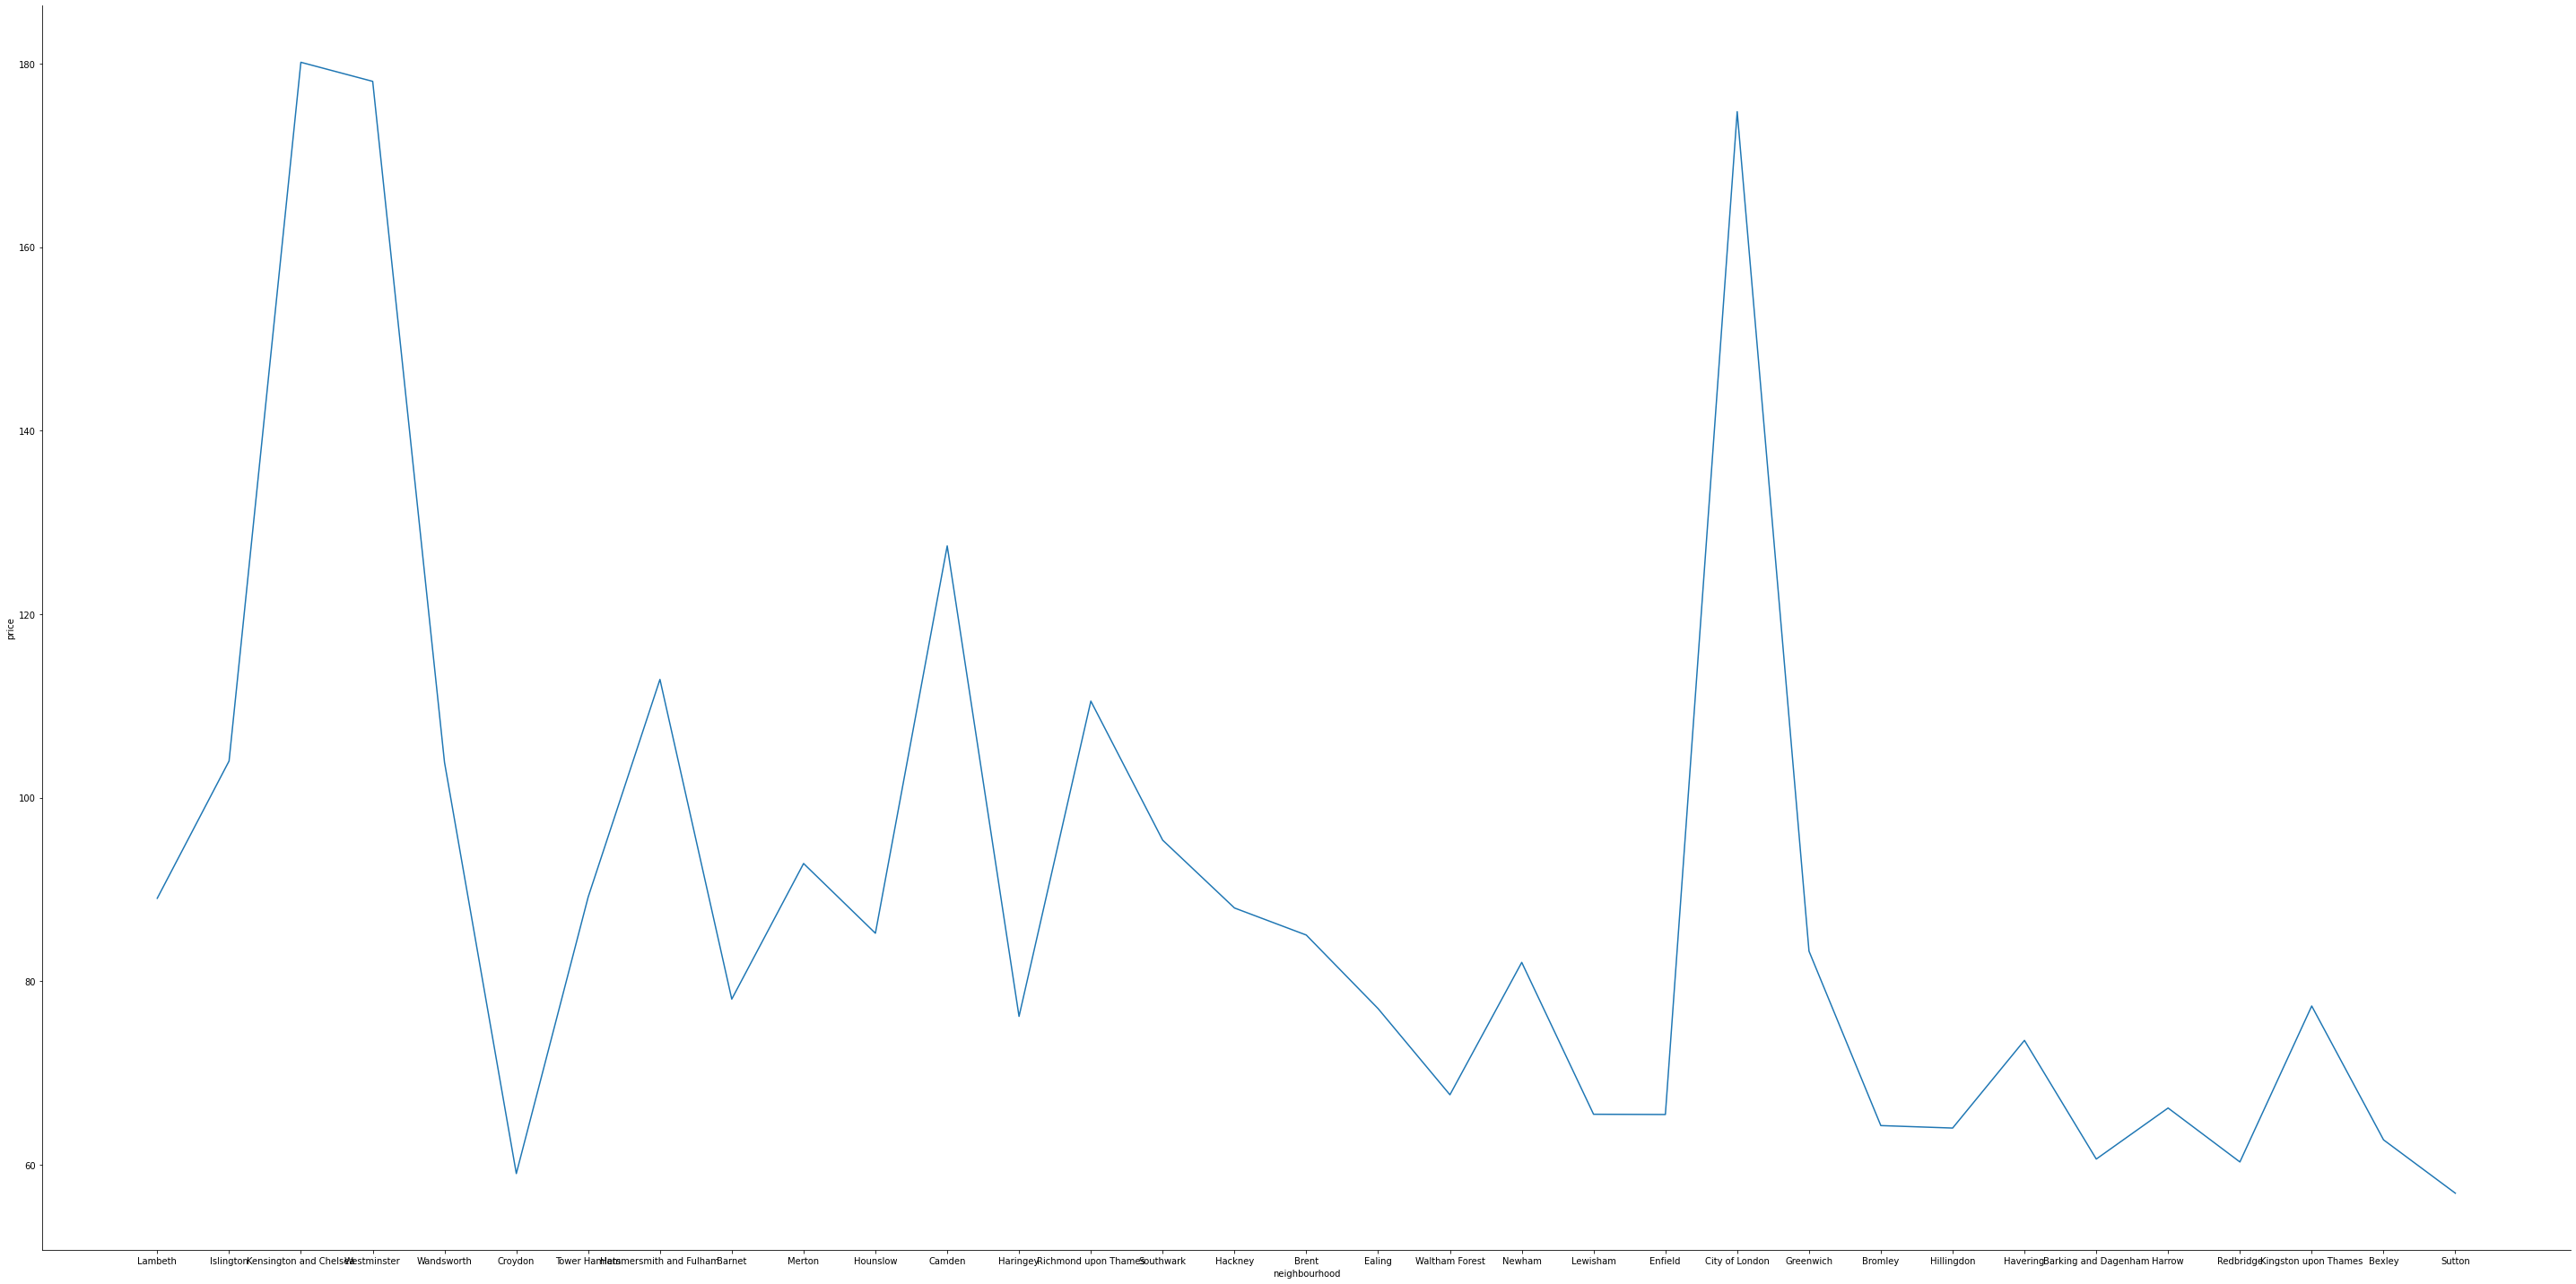

In [77]:
#Neighbourhood y price.
sns.relplot(x="neighbourhood", y="price", ci=None, kind="line", data=df4, aspect=2, height=20)

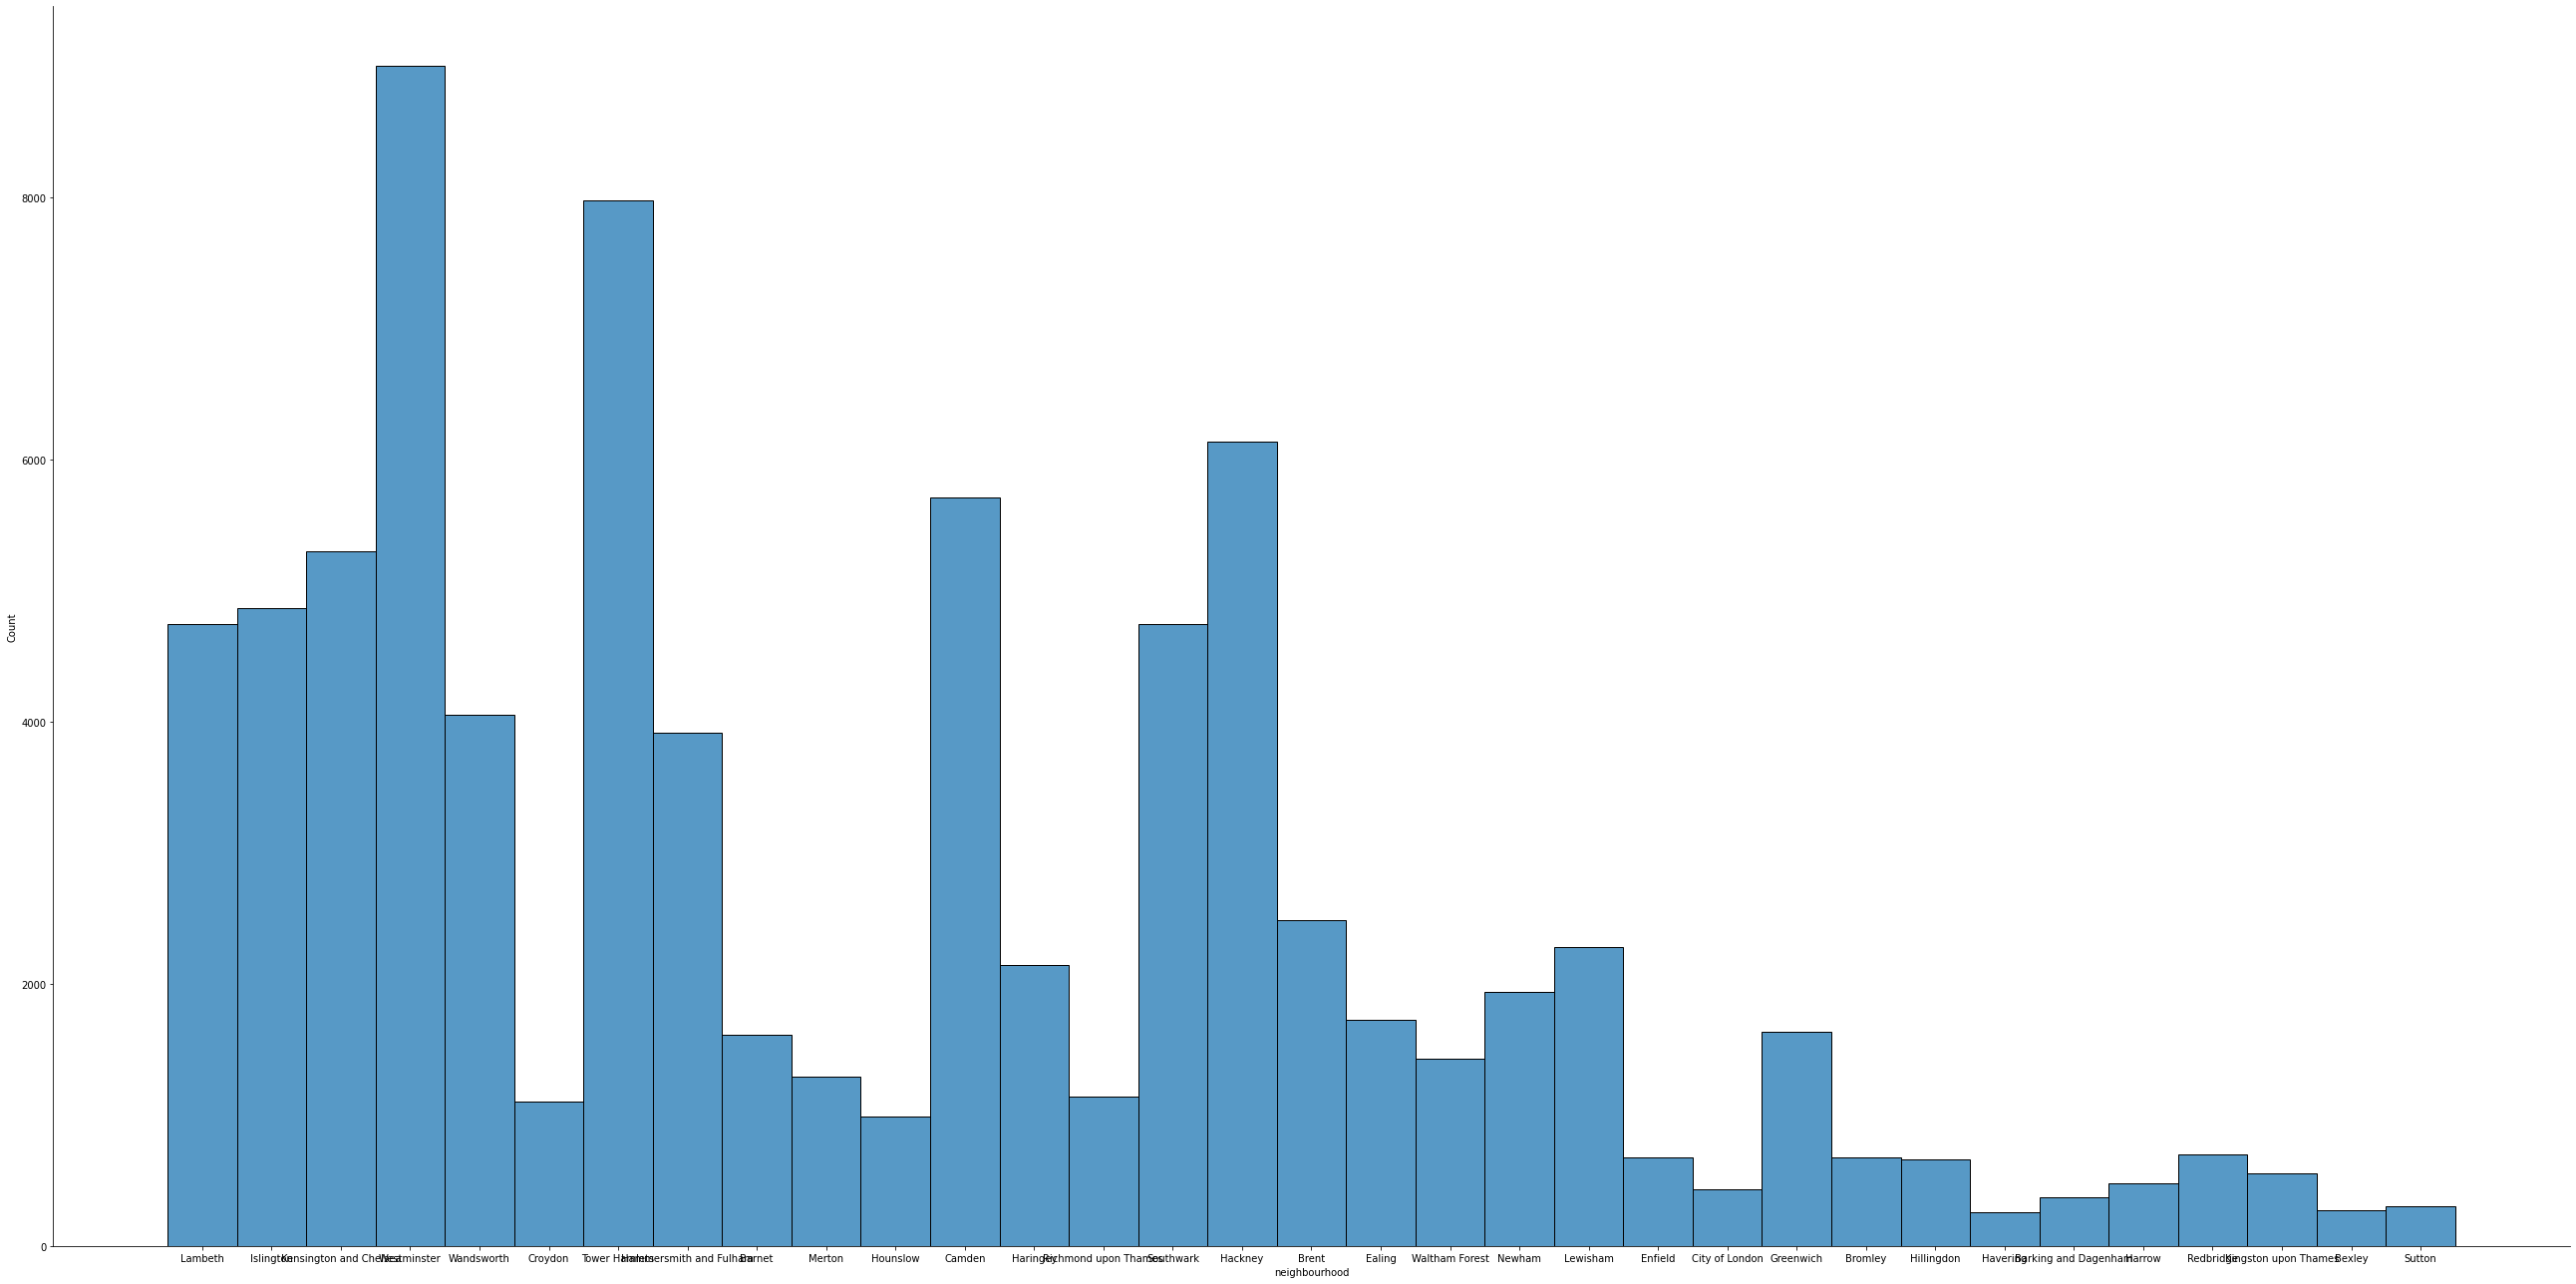

In [79]:
#Oferta de alquileres por barrio.
sns.displot(df4['neighbourhood'], aspect=2, height=18)

2. Cuáles son los vecindarios y tipo de alojamiento con mayor interacción?

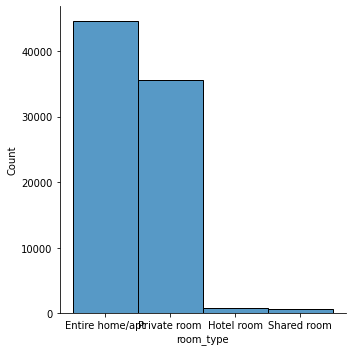

In [69]:
#Oferta por tipo de alojamientos en Londres.
sns.displot(df4['room_type'])

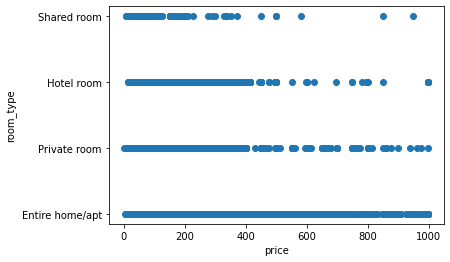

In [70]:
#tipo de alojamiento y precio.

plt.scatter(df4["price"], df4["room_type"])
plt.xlabel("price")
plt.ylabel("room_type")
plt.show()

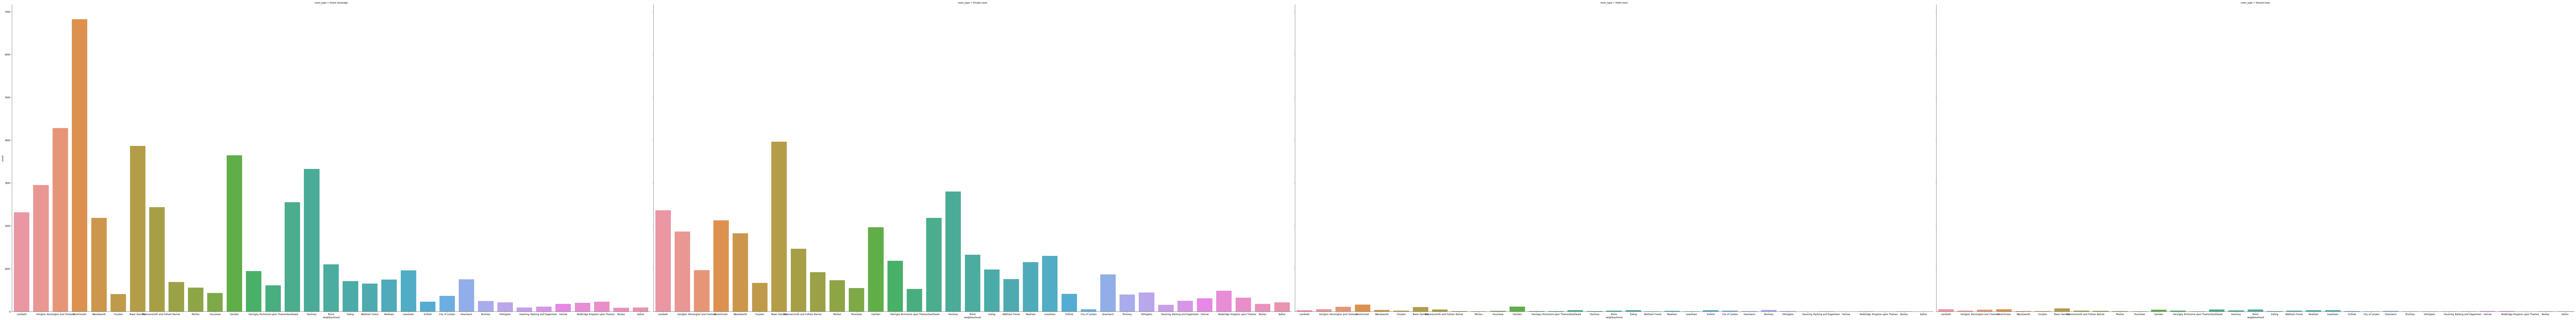

In [71]:
#TIPO DE ALOJAMIENTOS OFERTADAS POR VECINDARIO EN LONDRES.
sns.catplot(x ='neighbourhood', kind ='count', col ='room_type', data = df1, aspect=2, height=20)

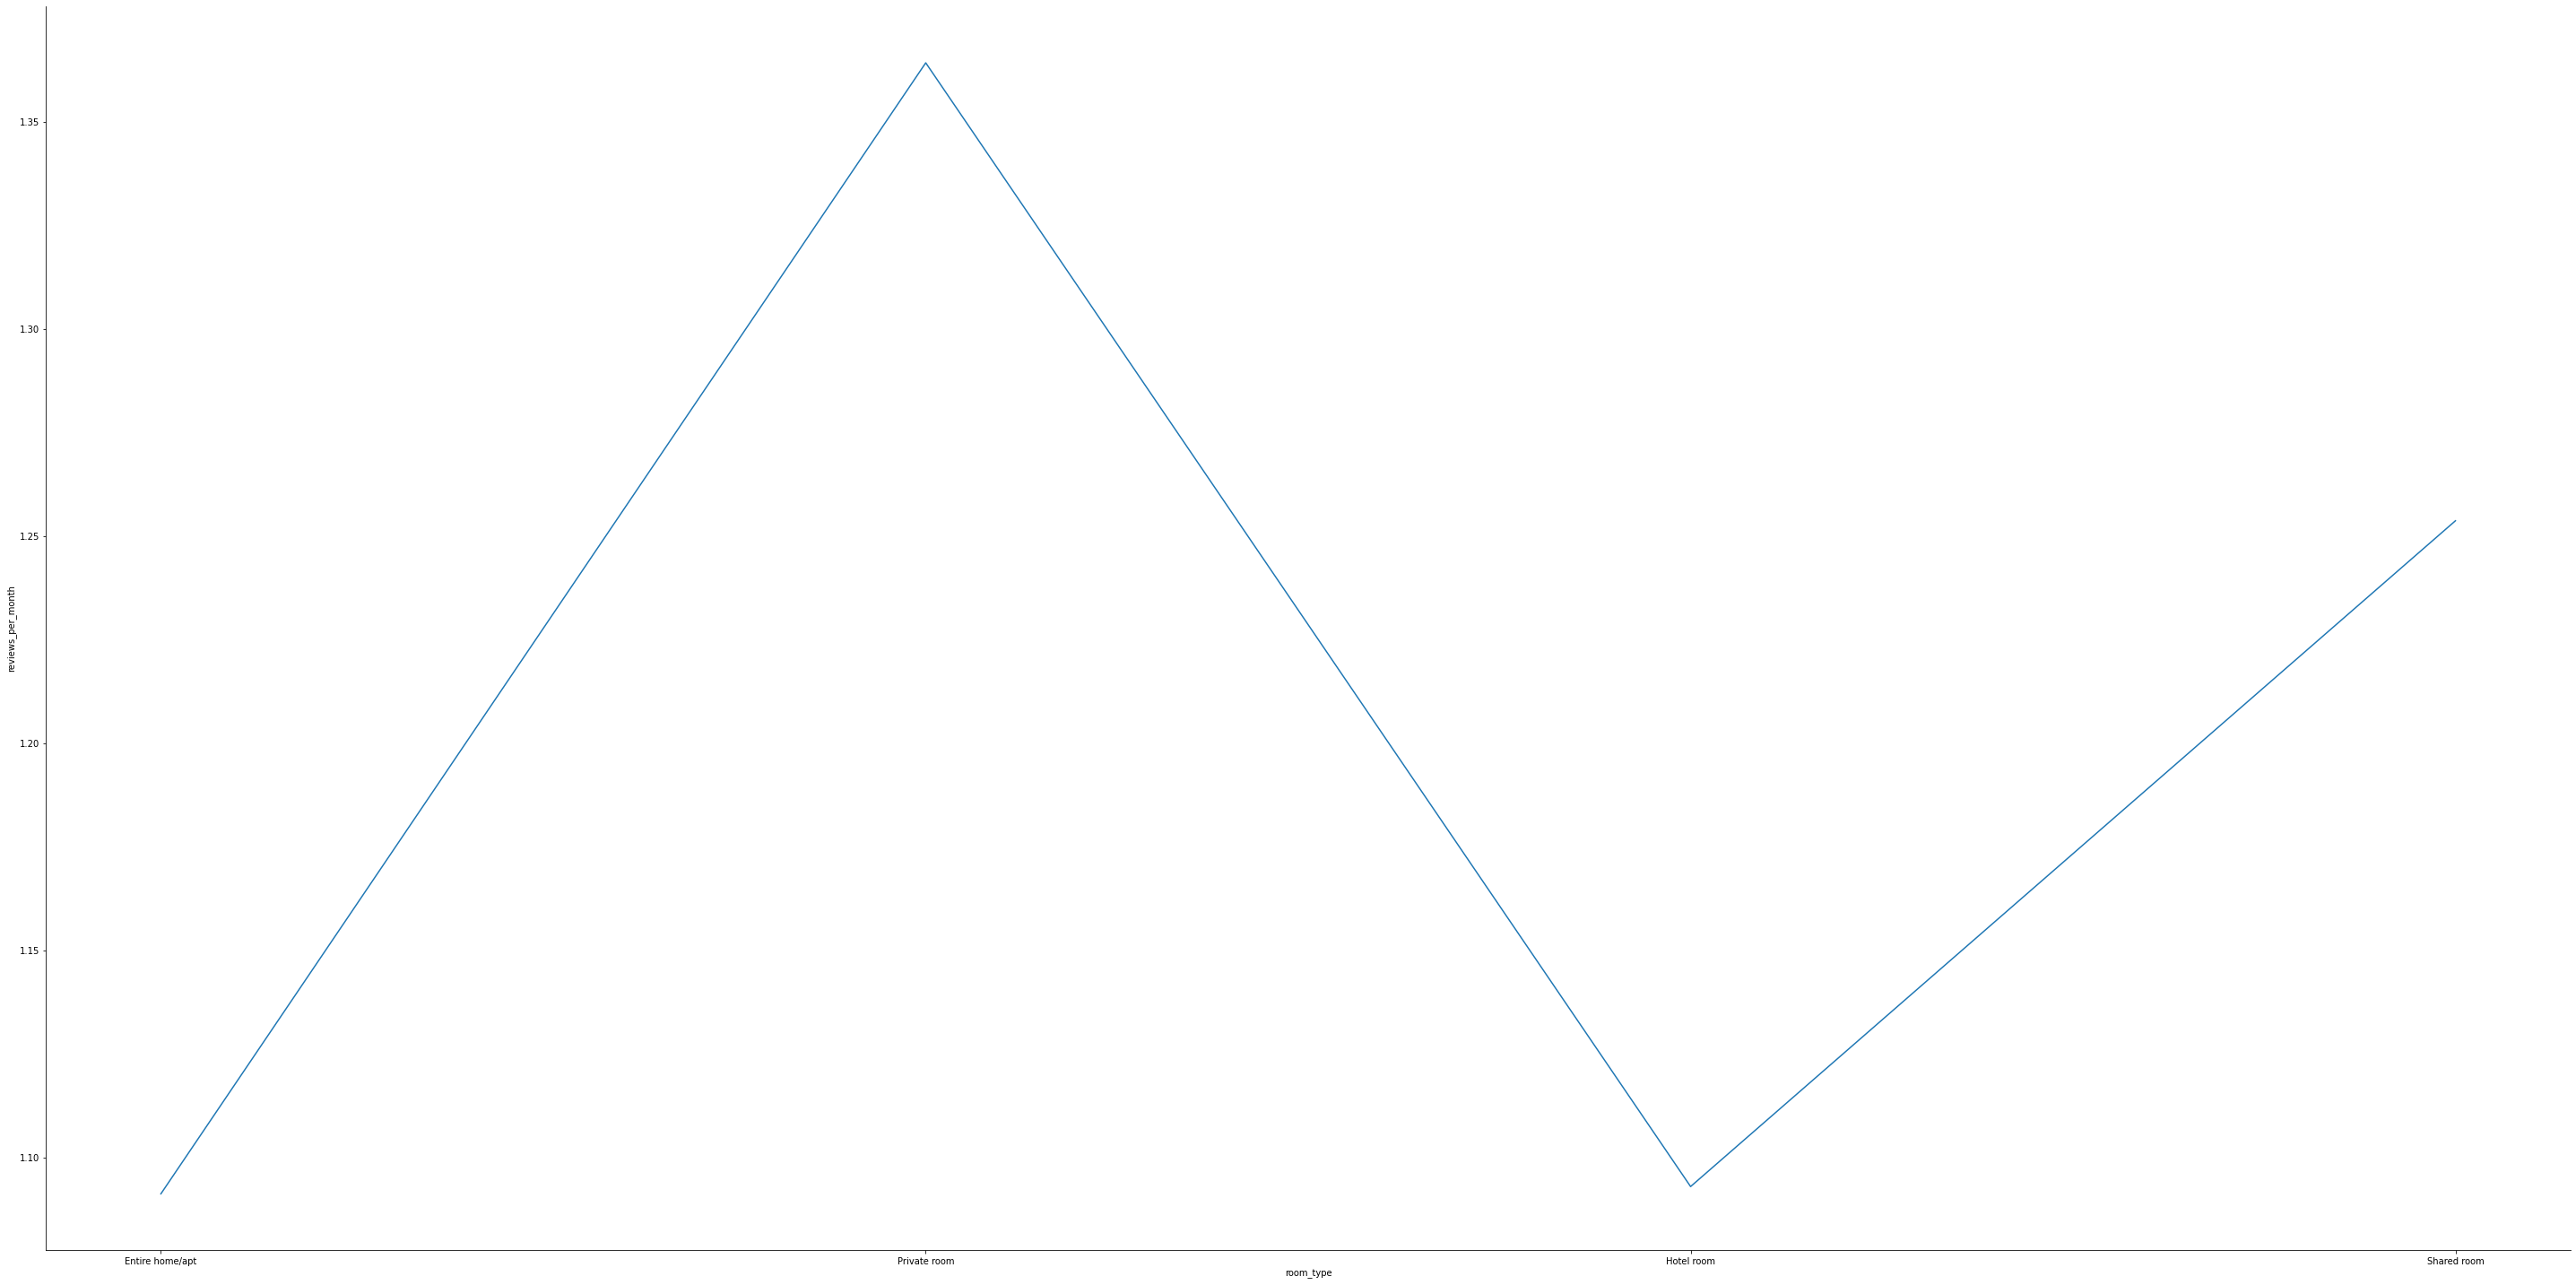

In [73]:
#Reseñas y visualización por tipo de habitación.
sns.relplot(x="room_type", y="reviews_per_month", ci=None, kind="line", data=df4, aspect=2, height=20)

**Conclusiones:**
+ 

In [ ]:
3. Cuáles es el tipo de alojamiento con mayor oferta en los vecindarios de Londres?

Pendiente: longitud/latitud: ubicación y características geográficas de los vecindarios de Londres.

**Se observa:** 
+ Los barrios que tienen más alojamientos posiblmente sean los más visitados.